In [2]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import re
import string

from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt


In [3]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
import spacy

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
#from nltk.tokenize.stanford import StanfordTokenizer


from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from nltk import ngrams, FreqDist

lemmatizer = WordNetLemmatizer()
tokenizer = ToktokTokenizer()

In [4]:
# for creating tokens from description sentences
from nltk.tokenize import RegexpTokenizer

In [5]:
# for n_grams extraction
from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS

In [6]:
# some functions for text pre-preparation
from textual import *

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
# For dimensionality reduction
import umap

In [8]:
# for standardization
from sklearn.preprocessing import StandardScaler as SS

In [9]:
# for linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Read in data

## Read in spatial data

In [31]:
# delete

#LA level
local_authority_map = gpd.read_file('LA_spatial/LAD_MAY_2021_UK_BFE_V2.shp')

In [34]:
#delete

local_authority_map

,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry
0,1,E06000001,Hartlepool,447160,531474,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((447213.900 537036.104, 447228.798 53..."
1,2,E06000002,Middlesbrough,451141,516887,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((448489.897 522071.798, 448592.597 52..."
2,3,E06000003,Redcar and Cleveland,464361,519597,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((455525.931 528406.654, 455724.632 52..."
3,4,E06000004,Stockton-on-Tees,444940,518183,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((444157.002 527956.304, 444165.898 52..."
4,5,E06000005,Darlington,428029,515648,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((423496.602 524724.299, 423497.204 52..."
...,...,...,...,...,...,...,...,...,...,...
369,370,W06000020,Torfaen,327459,200480,-3.05101,51.698360,82544.770980,1.262399e+08,"POLYGON ((323898.201 211287.499, 324115.698 21..."
370,371,W06000021,Monmouthshire,337812,209231,-2.90280,51.778271,250879.753346,8.860439e+08,"MULTIPOLYGON (((345965.201 181030.700, 345944...."
371,372,W06000022,Newport,337897,187432,-2.89769,51.582310,135651.510102,2.175180e+08,"POLYGON ((342211.900 194845.495, 342221.803 19..."
372,373,W06000023,Powys,302329,273255,-3.43531,52.348640,606560.015329,5.195456e+09,"POLYGON ((322392.901 334017.198, 322378.002 33..."


In [4]:
# region level
region_map = gpd.read_file('region_spatial/NUTS_Level_1_(January_2018)_Boundaries.shp')

In [5]:
region_map.columns

Index(['objectid', 'nuts118cd', 'nuts118nm', 'bng_e', 'bng_n', 'long', 'lat',
       'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

In [33]:
region_map

,objectid,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC,North East (England),417313,600358,-1.728900,55.297031,8.592429e+09,1.008435e+06,"MULTIPOLYGON (((398583.804 653093.703, 398566...."
1,2,UKD,North West (England),350015,506280,-2.772370,54.449451,1.416409e+10,2.075324e+06,"MULTIPOLYGON (((357067.497 586765.599, 357029...."
2,3,UKE,Yorkshire and The Humber,446903,448736,-1.287120,53.932640,1.540912e+10,1.385386e+06,"MULTIPOLYGON (((478300.699 518863.096, 478309...."
3,4,UKF,East Midlands (England),477660,322635,-0.849670,52.795719,1.564327e+10,1.332317e+06,"MULTIPOLYGON (((512572.598 414469.499, 512619...."
4,5,UKG,West Midlands (England),386294,295477,-2.203580,52.556969,1.300374e+10,9.539014e+05,"POLYGON ((402840.498 368845.598, 402862.397 36..."
5,6,UKH,East of England,571074,263229,0.504146,52.240669,1.913556e+10,2.646573e+06,"MULTIPOLYGON (((600880.500 346519.099, 600924...."
6,7,UKI,London,517516,178392,-0.308640,51.492271,1.573510e+09,4.202000e+05,"MULTIPOLYGON (((531643.597 200802.700, 531658...."
7,8,UKJ,South East (England),470062,172924,-0.993110,51.450970,1.908876e+10,2.443292e+06,"MULTIPOLYGON (((490173.603 256107.999, 490234...."
8,9,UKK,South West (England),285015,102567,-3.633430,50.811192,2.385137e+10,3.400380e+06,"MULTIPOLYGON (((416361.796 245471.004, 416367...."
9,10,UKL,Wales,263406,242881,-3.994160,52.067410,2.078213e+10,3.082421e+06,"MULTIPOLYGON (((312098.398 385255.901, 312105...."


## Read in Zoopla property data

In [ ]:
# The "sale_UK_year19_month67_processed" in the following cell is the data with removing the duplicated rows,
# this is because once a slight change in any field happened on one list, a new row will exist, so I only keep one row of each listing by their ID
# Also removed the listings with price_last of 0 and without description value, finally 186952 rows remain.


In [10]:
sale_UK_year19_month67_processed = pd.read_csv('sale_UK_year19_month67_gdf_remove_0price_nodescr.csv')

In [3]:
len(sale_UK_year19_month67_processed)

186952

In [4]:
sale_UK_year19_month67_processed

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_first,price_last,price_min,price_max,price_unique,...,agent_address,agent_postcode,image_caption,thumbnail_url,floor_plan,original_image,bullet,lad20nm,geometry,log_price_last
0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,265000,265000,265000,[265000],...,"35 High Street, Elgin",IV30 1EE,NaN,https://lid.zoocdn.com/80/60/e5ee3c9c272242c84...,"[""https://images.portalimages.com/tp/11249/1/f...","[""https://lc.zoocdn.com/e5ee3c9c272242c84d95b1...","[""Detached Bungalow"", ""Short Distance from Abe...",Moray,POINT (328083.0125193043 843196.9415193009),12.487485
1,1,51740789,Flat,2019-06-19,2019-07-06,62000,62000,62000,62000,[62000],...,"18 Woodside Place, Glasgow",G3 7QL,NaN,https://lid.zoocdn.com/80/60/6d83a2700159625b9...,"[""https://lc.zoocdn.com/353f7243744bfb44197cae...","[""https://lc.zoocdn.com/6d83a2700159625b90b528...","[""Open Viewing Monday 17th June at 10am"", ""Ope...",Aberdeen City,POINT (393789.0291688074 803226.1070653114),11.034890
2,2,52216410,Flat,2019-07-27,2019-10-31,200000,195000,195000,200000,[200000 195000],...,"123 Rosemount Place, Aberdeen",AB25 2YH,NaN,https://lid.zoocdn.com/80/60/377e30e5e5015988f...,"[""https://lc.zoocdn.com/3f1f0eeaa7fa7940f94015...","[""https://lc.zoocdn.com/377e30e5e5015988f6d711...","[""Stunning Grounds"", ""West-End Location"", ""Qui...",Aberdeen City,POINT (392418.0047321658 806465.2125680494),12.180755
3,3,51989870,Flat,2019-07-06,2019-10-10,60000,60000,60000,60000,[60000],...,"18 Woodside Place, Glasgow",G3 7QL,NaN,https://lid.zoocdn.com/80/60/622422d6d089ae4b1...,"[""https://lc.zoocdn.com/b7193e0772af038d378176...","[""https://lc.zoocdn.com/622422d6d089ae4b1ab568...","[""Part Of A Portfolio Of Two Properties"", ""Wel...",Aberdeen City,POINT (391937.0095760308 808831.9487470423),11.002100
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,305000,305000,305000,[305000],...,"Willow House, Kestrel View, Strathclyde Busine...",ML4 3PB,Photo 1,https://lid.zoocdn.com/80/60/fd7ba8619c67c728b...,NaN,"[""https://lc.zoocdn.com/fd7ba8619c67c728bbb615...",[],Aberdeenshire,POINT (358153.0274389331 815576.0158367396),12.628067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186947,187127,51910154,Flat,2019-06-28,2019-07-15,227500,227500,227500,227500,[227500],...,"82 Micklegate, York",YO1 6LF,Picture No. 08,https://lid.zoocdn.com/80/60/a18f9a27a9848d234...,"[""https://lc.zoocdn.com/a092fef6996a71710ce222...","[""https://lc.zoocdn.com/a18f9a27a9848d23419cd4...",[],York,POINT (459861.9931827815 449783.3542991093),12.334906
186948,187128,51938635,Semi-detached house,2019-07-02,2019-08-09,625000,595000,595000,625000,[625000 595000],...,"82 Micklegate, York",YO1 6LF,Picture No. 04,https://lid.zoocdn.com/80/60/059a4116b0897f683...,"[""https://lc.zoocdn.com/cfdbcdfba0e0c03f653e55...","[""https://lc.zoocdn.com/059a4116b0897f683cf77c...","[""Extended Period House"", ""Large Kitchen/Dinin...",York,POINT (458913.9872714524 453497.2616972995),13.296317
186949,187129,52201301,NaN,2019-07-25,2020-03-31,0,157500,0,195000,[ 0 195000 175000 157500],...,"20 Prospect Street, Bridlington",YO15 2AL,NaN,https://lid.zoocdn.com/80/60/eb3ef50e98ebe3edc...,NaN,"[""https://lc.zoocdn.com/eb3ef50e98ebe3edc6c212...","[""Stunning prestige Holiday Lodge"", ""Twelve Mo...",East Riding of Yorkshire,POINT (520982.9927456012 469338.9301284092),11.967181
186950,187130,51732997,End terrace house,2019-06-20,2019-07-25,210000,210000,210000,210000,[210000],...,"4 Finkle Street, Thirsk",YO7 1DA,Img_4924.Jpg,https://lid.zoocdn.com/80/60/6fff59b42e2bb932c...,"[""https://lc.zoocdn.com/acbf2d94baf0613ef3be6f...","[""https://lc.zoocdn.com/6fff59b42e2bb932c2ddac...",[],Hambleton,POINT (442856.0297122729 488955.1535691129),12.254863


In [5]:
sale_UK_year19_month67_processed.columns

Index(['Unnamed: 0', 'listing_id', 'property_type', 'start_date', 'end_date',
       'price_first', 'price_last', 'price_min', 'price_max', 'price_unique',
       'price_flag', 'num_bed_first', 'num_bed_last', 'num_bed_min',
       'num_bed_max', 'bed_flag', 'num_floors_min', 'num_floors_max',
       'num_bath_min', 'num_bath_max', 'num_reception_min',
       'num_reception_max', 'pcu', 'lon', 'lat', 'address', 'street_name',
       'property_num', 'post_town', 'country', 'county', 'listing_status',
       'epc_list', 'details_url', 'short_description', 'category',
       'description', 'zdocument', 'branch_id', 'image_url', 'agent_logo',
       'agent_name', 'agent_phone', 'agent_address', 'agent_postcode',
       'image_caption', 'thumbnail_url', 'floor_plan', 'original_image',
       'bullet', 'lad20nm', 'geometry', 'log_price_last'],
      dtype='object')

In [6]:
# remove useless columns 
sale_UK_year19_month67_processed[['listing_id', 'property_type', 'start_date', 'end_date','price_last','price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max', 'pcu', 'lon', 'lat', 'address', 'street_name',
       'property_num', 'post_town', 'country', 'county', 'category',
       'description','lad20nm', 'log_price_last']]

,listing_id,property_type,start_date,end_date,price_flag,num_bed_last,bed_flag,num_floors_max,num_bath_max,num_reception_max,...,address,street_name,property_num,post_town,country,county,category,description,lad20nm,log_price_last
0,51803281,Detached bungalow,2019-06-19,2019-07-18,1,3,1,0,2,3,...,Aberlour AB38,Aberlour Gardens,Aberglen,Aberlour,Scotland,Moray,Residential,Aberglen is a detached three bedroom bungalow ...,Moray,12.487485
1,51740789,Flat,2019-06-19,2019-07-06,1,2,1,0,0,0,...,"Auldearn Road, Aberdeen AB12",Auldearn Road,7,Aberdeen,Scotland,Aberdeenshire,Residential,"Two bedroom flatMassive £33,000 discount from ...",Aberdeen City,11.034890
2,52216410,Flat,2019-07-27,2019-10-31,2,2,1,0,2,0,...,"Beechgrove Gardens, Aberdeen AB15",Beechgrove Gardens,38,Aberdeen,Scotland,Aberdeenshire,Residential,Treemendous Beechgrove! Gorgeous two bedroom...,Aberdeen City,12.180755
3,51989870,Flat,2019-07-06,2019-10-10,1,2,1,0,0,0,...,"Hilton Drive, Aberdeen AB24",Hilton Drive,275,Aberdeen,Scotland,Aberdeenshire,Residential,Ground floor flatExcellent opportunity for the...,Aberdeen City,11.002100
4,51972428,Detached house,2019-07-04,2019-07-22,1,5,1,0,3,2,...,"Strone Crescent, Alford AB33",Strone Crescent,6,Alford,Scotland,Aberdeenshire,Residential,We are delighted to have been asked to market ...,Aberdeenshire,12.628067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186947,51910154,Flat,2019-06-28,2019-07-15,1,1,1,0,0,0,...,"The Residence, Bishopthorpe Road, York YO23",The Residence,"Apartment 133,",York,England,North Yorkshire,Residential,A very smart one bedroom luxury apartment loca...,York,12.334906
186948,51938635,Semi-detached house,2019-07-02,2019-08-09,2,4,1,0,0,0,...,"Flavian Grove, York, North Yorkshire YO30",Flavian Grove,1,York,England,North Yorkshire,Residential,The small collection of family houses which li...,York,13.296317
186949,52201301,NaN,2019-07-25,2020-03-31,4,3,1,0,0,0,...,"Flamborough Road, Sewerby, Bridlington YO15",Sewerby Bridlington,Flamborough Road,Bridlington,England,East Riding of Yorkshire,Residential,"One of the last few remaining, Hunters are del...",East Riding of Yorkshire,11.967181
186950,51732997,End terrace house,2019-06-20,2019-07-25,1,4,1,0,1,2,...,"South View, Borrowby, Thirsk YO7",South View,4,Thirsk,England,North Yorkshire,Residential,Available to purchase is this large family hom...,Hambleton,12.254863


In [11]:
# remove useless columns 
sale_UK_year19_month67_processed_1 = sale_UK_year19_month67_processed[['listing_id', 'property_type', 'start_date', 'end_date','price_last',
                                                                     'price_flag', 'num_bed_last','bed_flag','num_floors_max', 'num_bath_max', 
                                                                     'num_reception_max', 'pcu', 'lon', 'lat', 'address', 'street_name', 
                                                                     'property_num', 'post_town', 'country', 'county', 'category', 'description',
                                                                     'lad20nm', 'log_price_last']]

In [48]:
# create geo dataframe by longitude and latitude
sale_UK_year19_month67_processed_1_gdf = gpd.GeoDataFrame(sale_UK_year19_month67_processed_1, geometry = gpd.points_from_xy(sale_UK_year19_month67_processed_1.lon, sale_UK_year19_month67_processed_1.lat, crs='epsg:4326'))

In [49]:
# change crs to British National Grid
sale_UK_year19_month67_processed_1_gdf = sale_UK_year19_month67_processed_1_gdf.to_crs('epsg:27700')

# Descriptive analysis

## price

(array([1.77389e+05, 7.77700e+03, 1.04700e+03, 3.81000e+02, 1.21000e+02,
        7.70000e+01, 4.10000e+01, 4.00000e+01, 1.20000e+01, 1.70000e+01,
        9.00000e+00, 7.00000e+00, 3.00000e+00, 8.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00, 4.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([3.000000e+03, 7.629400e+05, 1.522880e+06, 2.282820e+06,
        3.042760e+06, 3.802700e+06, 4.562640e+06, 5.322580e+06,
        6.082520e+06, 6.842460e+06, 7.602400e+06, 8.362340e+06,
        9.122280e+06, 9.882220e+06, 1.064216e+07, 1.140210e+07,
        1.21

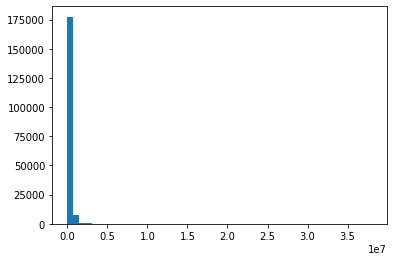

In [13]:
# "price_last" is the price of the property which appeared on the last day of listing life
plt.hist(sale_UK_year19_month67_processed_1['price_last'],bins=50)

(array([1.1000e+01, 1.0000e+00, 2.2000e+01, 5.0000e+00, 8.0000e+00,
        1.2000e+01, 2.9000e+01, 1.2000e+01, 7.2000e+01, 7.1000e+01,
        1.3700e+02, 2.1500e+02, 2.8300e+02, 6.8700e+02, 1.1770e+03,
        2.1480e+03, 3.1720e+03, 6.0770e+03, 7.3670e+03, 1.3559e+04,
        1.3695e+04, 2.0433e+04, 1.8841e+04, 1.9766e+04, 2.0690e+04,
        1.7721e+04, 1.2590e+04, 9.9090e+03, 6.9510e+03, 4.4570e+03,
        2.4490e+03, 1.5450e+03, 1.0620e+03, 6.1000e+02, 3.8300e+02,
        2.8600e+02, 1.8400e+02, 8.4000e+01, 8.6000e+01, 4.5000e+01,
        3.5000e+01, 2.4000e+01, 1.4000e+01, 5.0000e+00, 7.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 8.00636757,  8.19530215,  8.38423673,  8.57317132,  8.7621059 ,
         8.95104048,  9.13997507,  9.32890965,  9.51784423,  9.70677881,
         9.8957134 , 10.08464798, 10.27358256, 10.46251715, 10.65145173,
        10.84038631, 11.0293209 , 11.21825548, 11.40719006, 11.59612464,
        11.78505923, 11.97

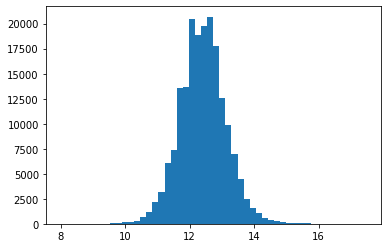

In [15]:
plt.hist(sale_UK_year19_month67_processed_1['log_price_last'],bins=50)

## Property type

In [19]:
property_type = sale_UK_year19_month67_processed_1.groupby('property_type').size().sort_values(ascending=False)

In [20]:
type(property_type)

pandas.core.series.Series

In [23]:
property_type

property_type
Semi-detached house       40592
Flat                      34549
Detached house            33771
Terraced house            32220
End terrace house         11171
Detached bungalow          6623
Bungalow                   5369
Semi-detached bungalow     2917
Maisonette                 2901
Town house                 2677
Cottage                    1930
Link-detached house         993
Land                        901
Mobile/park home            807
Studio                      739
Barn conversion             443
Mews house                  341
Chalet                      309
Villa                       303
Terraced bungalow           195
Block of flats              123
Farmhouse                   115
Country house               110
Lodge                        99
Parking/garage               81
Farm                         67
Equestrian property          50
Houseboat                    29
Leisure/hospitality          26
Retail premises              18
Office                    

## Region

In [ ]:
# the data set does not contain a colomn about the "region" of each listing, therefore we need to create by merging the data set with the region data

In [102]:
merge = gpd.sjoin(sale_UK_year19_month67_processed_1_gdf, region, op='within') 

F:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


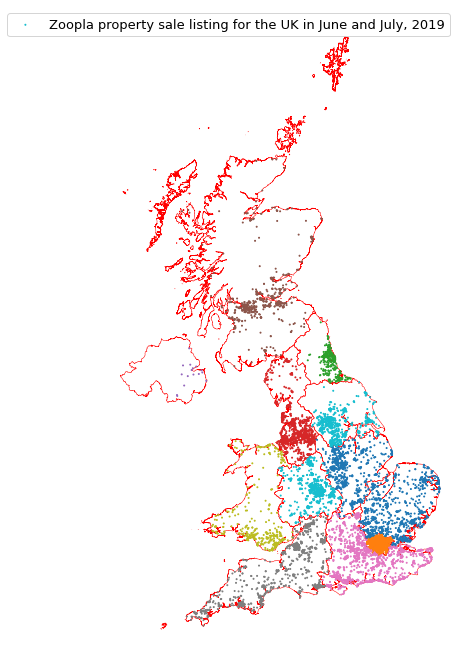

In [104]:
# plot those property listing as point in the map
fig, ax = plt.subplots(1,1, figsize=(15,12))

region.plot(ax = ax,edgecolor='red', facecolor='none', linewidth=0.5,alpha=1)
merge.sample(10000,random_state=42).plot(column ='nuts118nm' ,markersize=1,ax=ax,label='Zoopla property sale listing for the UK in June and July, 2019',legend=True)
ax.axis('off')
plt.legend()
ax.legend(fontsize = 13)
plt.show()

In [106]:
merge.groupby('nuts118nm').size().sort_values(ascending=False)

nuts118nm
South East (England)        32450
London                      23216
North West (England)        22014
East of England             21018
South West (England)        19574
East Midlands (England)     14395
Yorkshire and The Humber    14027
West Midlands (England)     14020
Scotland                    10376
Wales                        8568
North East (England)         6443
Northern Ireland              365
dtype: int64

In [108]:
merge.to_csv('UK_2019_67_sale_with_region.csv')

In [107]:
merge

,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,num_bath_max,...,index_right,objectid,nuts118cd,nuts118nm,bng_e,bng_n,long,lat_right,st_areasha,st_lengths
0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,0,2,...,10,11,UKM,Scotland,277746,700060,-3.97091,56.177429,7.880324e+10,1.886818e+07
1,51740789,Flat,2019-06-19,2019-07-06,62000,1,2,1,0,0,...,10,11,UKM,Scotland,277746,700060,-3.97091,56.177429,7.880324e+10,1.886818e+07
2,52216410,Flat,2019-07-27,2019-10-31,195000,2,2,1,0,2,...,10,11,UKM,Scotland,277746,700060,-3.97091,56.177429,7.880324e+10,1.886818e+07
3,51989870,Flat,2019-07-06,2019-10-10,60000,1,2,1,0,0,...,10,11,UKM,Scotland,277746,700060,-3.97091,56.177429,7.880324e+10,1.886818e+07
4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,3,...,10,11,UKM,Scotland,277746,700060,-3.97091,56.177429,7.880324e+10,1.886818e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150719,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,1,1,...,3,4,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,1.564327e+10,1.332317e+06
150720,51737953,End terrace house,2019-06-19,2019-08-06,122500,2,2,1,0,1,...,3,4,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,1.564327e+10,1.332317e+06
150725,52189656,Terraced house,2019-07-25,2019-09-06,185000,1,3,1,0,1,...,3,4,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,1.564327e+10,1.332317e+06
150729,52126406,Semi-detached house,2019-07-19,2019-08-06,230000,1,3,1,0,1,...,3,4,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,1.564327e+10,1.332317e+06


In [2]:
merge = pd.read_csv('UK_2019_67_sale_with_region.csv')

In [13]:
merge.property_type.values

array(['Detached bungalow', 'Flat', 'Flat', ..., 'Terraced house',
       'Semi-detached house', 'End terrace house'], dtype=object)

In [3]:
UK_2019sale_month67 = merge.drop(columns=['Unnamed: 0','geometry','index_right','objectid', 'bng_e', 'bng_n', 'long', 'lat_right',
       'st_areasha', 'st_lengths', 'geometry'])

In [4]:
UK_2019sale_month67.shape

(186466, 26)

In [7]:
df_region = UK_2019sale_month67.groupby('nuts118nm')['price_last'].agg(['count','mean']).sort_values(by='count',ascending=False)

In [10]:
df_region['region'] = df_region.index

In [11]:
df_region

,count,mean,region
nuts118nm,,,
South East (England),32450,404051.417072,South East (England)
London,23216,657785.793375,London
North West (England),22014,195580.867221,North West (England)
East of England,21018,355464.872776,East of England
South West (England),19574,293672.289057,South West (England)
East Midlands (England),14395,228774.590483,East Midlands (England)
Yorkshire and The Humber,14027,199162.968489,Yorkshire and The Humber
West Midlands (England),14020,239490.053067,West Midlands (England)
Scotland,10376,169480.636758,Scotland


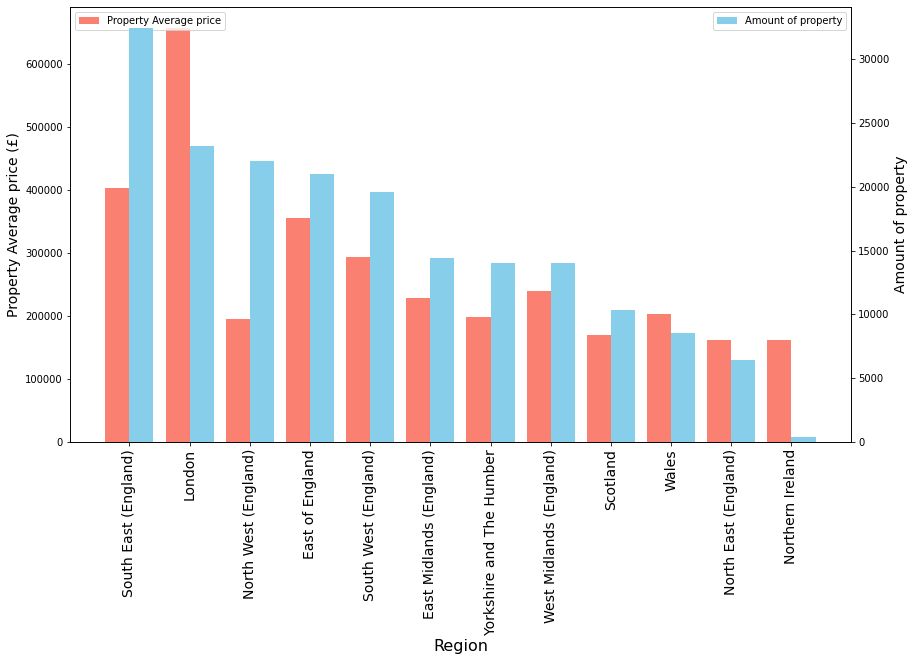

In [12]:
# make visiualisation

# Define Data

x = df_region['region']
X_axis = np.arange(len(x))
data_1 = df_region['mean']
data_2 = df_region['count'] 
  
# Create Plot

fig, ax1 = plt.subplots(figsize=(14, 8)) 
  
ax1.set_xlabel('Region',fontsize=16) 
ax1.set_ylabel('Property Average price (£)', color = 'black',fontsize=14) 
ax1.bar(X_axis-0.2, data_1,0.4, color = 'salmon',label='Property Average price') 
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.legend(loc=2) 
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Amount of property', color = 'black',fontsize=14) 
ax2.bar(X_axis+0.2, data_2,0.4, color = 'skyblue',label='Amount of property') 
ax2.tick_params(axis ='y', labelcolor = 'black') 
ax2.legend(loc=1)

plt.xticks(X_axis,x)
#plt.xticks(rotation=90)
ax1.tick_params(axis='x', labelrotation = 90)

# plt.xlabel('xlabel', fontsize=18)

ax1.xaxis.set_tick_params(labelsize=14)

# Show plot
#plt.legend(['a','b'],loc=2)

plt.show()

# Text prepocessing

In [16]:
UK_2019sale_month67[UK_2019sale_month67.description.isna()]

,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,num_bath_max,...,property_num,post_town,country,county,category,description,lad20nm,log_price_last,nuts118cd,nuts118nm


In [25]:
# first we can have a look at one description
UK_2019sale_month67.description[5828]

'Falloisg is a well presented spacious three double bedroom bungalow set in an elevated position in the popular village of Lochcarron, where delightful views over Loch Carron and out to the hills beyond are afforded.Falloisg is a well presented bungalow located in the heart of the popular village of Lochcarron. The property was built circa 1985 and whilst needing some degree of modernisation it boasts an interior of three double bedrooms, a shower room, bathroom, large lounge, dining room and ample sized kitchen, and large garage. Falloisg is ideally positioned to take in the wonderful views on offer and sits within generous garden grounds with private parking.Internally the property boasts generous living accommodation, ample built in storage space, UPVC double glazed windows, oil central heating, neutral decor, two bathrooms and an original fire place.Falloisg offers prospective purchaser the opportunity to acquire a generous family home set close to the local amenities Lochcarron ha

In [26]:
# we use the function from textual package which is imported at the beginning, and we can see the result of the processing
# numbers， Punctuation and special symbols were removed
# lemmatization was also finished by this function

normalise_document(UK_2019sale_month67.description[5828], html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     punctuation_removal=True, keep_sentences=True, 
                     stopword_removal=False, remove_digits=True, infer_numbers=True, 
                     shortest_word=2)

'falloisg well present spacious three double bedroom bungalow set elevated position the popular village lochcarron where delightful view over loch carron and out the hill beyond afforded falloisg well present bungalow locate the heart the popular village lochcarron the property build circa and whilst need some degree modernisation boast interior three double bedroom shower room bathroom large lounge din room and ample sized kitchen and large garage falloisg ideally position take the wonderful view offer and sits within generous garden ground with private parking internally the property boast generous live accommodation ample build storage space upvc double glaze window oil central heating neutral decor two bathroom and original fire place falloisg offer prospective purchaser the opportunity acquire generous family home set close the local amenity lochcarron have offer equally could provide magnificent holiday let home have the past ground floorentrance porchsteps from outside lead wood

In [29]:
# then we apply this function to all the data and it takes 2 hours to process 

%%time
UK_2019sale_month67['description_norm'] = UK_2019sale_month67.description.apply(normalise_document,html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     punctuation_removal=True, keep_sentences=True, 
                     stopword_removal=False, remove_digits=True, infer_numbers=True, 
                     shortest_word=2)

Wall time: 2h 4min 38s


In [32]:
# have a check

UK_2019sale_month67.description[36]

'Ideally situated in a quiet residential area close to Holburn Street and the Robert Gordon University, we are pleased to present this well presented one bedroom flat which is in a ready to move into condition.This property boasts gas central heating and double glazing throughout as well as fantastic storage. It would make an ideal first time purchase or buy to let investment due to its close proximity to rgu. Early viewing is highly recommended.Lounge 16\' x 11\'6" Well proportioned lounge with feature electric fireplace, neutrally painted walls and carpeted floor.Kitchen 11\'3" x 7\'5" The galley style kitchen benefits from a good range of fitted units . The flooring is laminate and walls are neutral.Utility 4\'10" x 4\'2" A handy utility / pantry room is accessed via the kitchen with ample space for shelving and appliances as required.Bedroom 11\'3" x 10\'4" Spacious double bedroom with two very large built in cupboards providing excellent storage space.Bathroom 9\'5" x 4\'10" Conte

In [46]:
UK_2019sale_month67.description_norm[265]

'spacious semi detached dwellinghouse situate popular residential area the coastal town buckie the property conveniently place for the town centre shop supermarket and school this home have extend over the year and now offer spacious well appoint accommodation over two floor and benefit from full double glazing installed and mains gas central heating new boiler new oak panel interior door have fit the ground floor the present owner have present the property well have tastefully decorate neutral tone and all floorcoverings curtain window blind and lightfittings will remain and have include the sale price leave this home move condition hallway lounge din room fit kitchen utility room bathroom double bedroom large front garden driveway enclose rear garden'

In [35]:
# then we need to create token list for each listing, this is a must for n_gram extracting in the next step
# first create a list
token_list = list()

In [39]:
# then create it 

%%time
for line in UK_2019sale_month67['description_norm']:

    #create word tokens as well as remove puntuation in one go
    rem_tok_punc = RegexpTokenizer(r'\w+')

    tokens = rem_tok_punc.tokenize(line)


    #convert the words to lower case
    words = [w.lower() for w in tokens]

    #Invoke all the english stopwords
    
    #Remove stop words
    #words = [w for w in words if not w in stopword_list]
    words = [w for w in words if all(digit not in w for digit in "1234567890")]
#     for w in words:
#         w = lemmatizer.lemmatize(w)
        
    words = [lemmatizer.lemmatize(t) for t in words]


    #Append words in the review_data_list list.
    token_list.append(words)


Wall time: 5min 10s


In [40]:
token_list[36]

['ideally',
 'situate',
 'quiet',
 'residential',
 'area',
 'close',
 'holburn',
 'street',
 'and',
 'the',
 'robert',
 'gordon',
 'university',
 'pleased',
 'present',
 'this',
 'well',
 'present',
 'one',
 'bedroom',
 'flat',
 'which',
 'ready',
 'move',
 'into',
 'condition',
 'this',
 'property',
 'boast',
 'gas',
 'central',
 'heating',
 'and',
 'double',
 'glaze',
 'throughout',
 'well',
 'fantastic',
 'storage',
 'would',
 'make',
 'ideal',
 'first',
 'time',
 'purchase',
 'buy',
 'let',
 'investment',
 'due',
 'it',
 'close',
 'proximity',
 'rgu',
 'early',
 'viewing',
 'highly',
 'recommended',
 'lounge',
 'well',
 'proportioned',
 'lounge',
 'with',
 'feature',
 'electric',
 'fireplace',
 'neutrally',
 'paint',
 'wall',
 'and',
 'carpet',
 'floor',
 'kitchen',
 'the',
 'galley',
 'style',
 'kitchen',
 'benefit',
 'from',
 'good',
 'range',
 'fitted',
 'unit',
 'the',
 'flooring',
 'laminate',
 'and',
 'wall',
 'neutral',
 'utility',
 'handy',
 'utility',
 'pantry',
 'room',
 

In [41]:
# add it back as a new column

UK_2019sale_month67['tokens'] = token_list

In [42]:
UK_2019sale_month67.head(3)

,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,num_bath_max,...,country,county,category,description,lad20nm,log_price_last,nuts118cd,nuts118nm,description_norm,tokens
0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,0,2,...,Scotland,Moray,Residential,Aberglen is a detached three bedroom bungalow ...,Moray,12.487485,UKM,Scotland,aberglen detached three bedroom bungalow situa...,"[aberglen, detached, three, bedroom, bungalow,..."
1,51740789,Flat,2019-06-19,2019-07-06,62000,1,2,1,0,0,...,Scotland,Aberdeenshire,Residential,"Two bedroom flatMassive £33,000 discount from ...",Aberdeen City,11.034890,UKM,Scotland,two bedroom flatmassive discount from home rep...,"[two, bedroom, flatmassive, discount, from, ho..."
2,52216410,Flat,2019-07-27,2019-10-31,195000,2,2,1,0,2,...,Scotland,Aberdeenshire,Residential,Treemendous Beechgrove! Gorgeous two bedroom...,Aberdeen City,12.180755,UKM,Scotland,treemendous beechgrove gorgeous two bedroom pr...,"[treemendous, beechgrove, gorgeous, two, bedro..."


In [47]:
# check the length (the length is not the actual length of the description because it has been processed, so ths length can be thought as the length of "useful description")
len(UK_2019sale_month67['tokens'][265])

117

In [48]:
# then calculate each listing's length
len_tokens = list()
for i in UK_2019sale_month67['tokens']:
    len_tokens.append(len(i))

In [50]:
UK_2019sale_month67['tokens_len'] = len_tokens

In [68]:
UK_2019sale_month67['tokens_len'][336]

38

In [52]:
# there is another way to calculate the length of each description
UK_2019sale_month67['len_description'] = UK_2019sale_month67.apply(lambda row: len(row.tokens), axis=1)

In [57]:
UK_2019sale_month67.tokens

0         [aberglen, detached, three, bedroom, bungalow,...
1         [two, bedroom, flatmassive, discount, from, ho...
2         [treemendous, beechgrove, gorgeous, two, bedro...
3         [ground, floor, flatexcellent, opportunity, fo...
4         [delight, have, ask, market, this, super, bedr...
                                ...                        
186461    [exclusive, reservation, offer, now, sale, off...
186462    [main, description, vendor, chain, step, stone...
186463    [sutton, way, always, very, popular, when, pro...
186464    [very, well, present, and, proportion, three, ...
186465    [boast, three, genuine, double, bedroom, large...
Name: tokens, Length: 186466, dtype: object

## n-grams phrase extracting

In [59]:
# now move to the phrase extracting
# references：https://radimrehurek.com/gensim/models/phrases.html
# define a function for extracting 2_grams 

def build_phrases_1(sentences):
    phrases = Phrases(sentences,
                      min_count=50,
                      threshold=5,
                      progress_per=1000)
    return Phraser(phrases)

# max_vocab_size=40000000

In [97]:
# this function is for extracting 3_gram from 2_grams

def build_phrases_3(sentences):
    phrases = Phrases(sentences,
                      min_count=50,
                      threshold=3,
                      progress_per=1000)
    return Phraser(phrases)

In [64]:
# this function is for splitting sentance to single token

def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

In [ ]:
# UK_2019sale_month67['tokens'] = UK_2019sale_month67.apply(lambda row: eval(row.token_new), axis=1)

In [62]:
%%time
phrases_model_1 = build_phrases_1(UK_2019sale_month67['tokens'])

Wall time: 1min 45s


In [71]:
sentence_to_bi_grams(phrases_model_1,UK_2019sale_month67['tokens'][2333])

'closing_date set for tuesday_july noon this beautifully refurbish upper villa which retain attractive original feature lie the popular newington area south edinburgh the sitting room spacious and comfortable room with large bay window and stylish woodburning multi_fuel stove the kitchen contemporary with sleek white unit and work_surface there ample space for dining table and chair make this great space entertain the property have two generously_proportion double bedroom both with space for free_standing bedroom furniture the master bedroom further benefit_from large built_wardrobe the bathroom have white_suite with shower over the bath and white metro tiling the property have attractively maintain garden the rear with lawn area and bed plant with mature_shrub there free street and permit parking the area the property fully double glaze and have gas_central heating great location the heart edinburgh this lovely home perfect move condition hall msitting room mkitchen dining room mdoubl

In [78]:
UK_2019sale_month67['bi_gram_tokens'] = UK_2019sale_month67.apply(lambda row: sentence_to_bi_grams(phrases_model_1, row.tokens), axis=1)

In [79]:
UK_2019sale_month67['bi_gram_tokens'][2333]

'closing_date set for tuesday_july noon this beautifully refurbish upper villa which retain attractive original feature lie the popular newington area south edinburgh the sitting room spacious and comfortable room with large bay window and stylish woodburning multi_fuel stove the kitchen contemporary with sleek white unit and work_surface there ample space for dining table and chair make this great space entertain the property have two generously_proportion double bedroom both with space for free_standing bedroom furniture the master bedroom further benefit_from large built_wardrobe the bathroom have white_suite with shower over the bath and white metro tiling the property have attractively maintain garden the rear with lawn area and bed plant with mature_shrub there free street and permit parking the area the property fully double glaze and have gas_central heating great location the heart edinburgh this lovely home perfect move condition hall msitting room mkitchen dining room mdoubl

In [83]:
UK_2019sale_month67['bi_gram_tokens'][2].split(' ')

['treemendous',
 'beechgrove',
 'gorgeous',
 'two',
 'bedroom',
 'property',
 'locate',
 'the',
 'west_end',
 'aberdeen',
 'this',
 'beautifully_present',
 'first',
 'floor',
 'apartment',
 'part',
 'stunning',
 'west_end',
 'development',
 'aberdeen',
 'west_end',
 'thriving',
 'area',
 'with',
 'wide_variety',
 'shop',
 'restaurant',
 'and',
 'cafe',
 'it',
 'doorstep',
 'there',
 'fantastic',
 'public',
 'park',
 'just_short',
 'walk',
 'from',
 'the',
 'property',
 'area',
 'feature',
 'include',
 'rosemount',
 'include',
 'variety',
 'amenity',
 'city_centre',
 'just_minute',
 'walk',
 'proximity',
 'westburn',
 'victoria',
 'park',
 'excellent_transport',
 'link',
 'all',
 'area',
 'the',
 'citylounge',
 'modern',
 'living',
 'and',
 'din',
 'area',
 'with',
 'large',
 'window',
 'which',
 'provide',
 'excellent',
 'natural_light',
 'make',
 'this',
 'space',
 'ideal',
 'for',
 'entertaining',
 'kitchen',
 'diner',
 'modern',
 'kitchen',
 'with',
 'range',
 'appliance',
 'include

In [84]:
UK_2019sale_month67['bi_gram_token_list'] = UK_2019sale_month67.apply(lambda row: row['bi_gram_tokens'].split(' '),axis=1)

In [86]:
UK_2019sale_month67['bi_gram_token_list']

0         [aberglen, detached, three, bedroom, bungalow,...
1         [two, bedroom, flatmassive, discount, from, ho...
2         [treemendous, beechgrove, gorgeous, two, bedro...
3         [ground, floor, flatexcellent, opportunity, fo...
4         [delight, have, ask, market, this, super, bedr...
                                ...                        
186461    [exclusive, reservation, offer, now, sale, off...
186462    [main, description, vendor, chain, step, stone...
186463    [sutton, way, always, very, popular, when, pro...
186464    [very, well_present, and, proportion, three, b...
186465    [boast, three, genuine, double, bedroom, large...
Name: bi_gram_token_list, Length: 186466, dtype: object

In [98]:
%%time
phrases_model_3 = build_phrases_3(UK_2019sale_month67['bi_gram_token_list'])

Wall time: 1min 17s


In [105]:
sentence_to_bi_grams(phrases_model_3,UK_2019sale_month67['bi_gram_token_list'][2313])

'closing_date_set for tuesday_july noon spacious three bedroom double upper_villa need_modernisation with private garden form_part row colony flat locate pedestrianised area edinburgh popular haymarket district the west the city_centre the ground_floor entrance stairway_lead the carpet hall which serve each room the first_floor and open into the spacious living_room which feature carpet_flooring and edinburgh_press set off the living_room the kitchen fit with wall_and_base_unit with stone_effect worktops_stainless_steel sink and freestanding_gas cooker and fridge generously_size_bedroom one set the front and may use sitting_room with carpet_flooring and storage_cupboard whilst the include contemporary toilet and wash_hand_basin the second_floor bedroom two have carpet_flooring fitted_wardrobe and ample_space for freestanding bedroom furniture while front_facing bedroom three similarly size and include bay_window and good_size storage_cupboard the bathroom have skylight and fit with col

In [107]:
UK_2019sale_month67['tri_gram_token'] = UK_2019sale_month67.apply(lambda row: sentence_to_bi_grams(phrases_model_3,row.bi_gram_token_list), axis=1)

In [108]:
UK_2019sale_month67['tri_gram_token']

0         aberglen detached three bedroom bungalow_situa...
1         two bedroom flatmassive discount from home_rep...
2         treemendous beechgrove gorgeous two bedroom pr...
3         ground_floor flatexcellent opportunity for the...
4         delight have ask market_this super bedroom det...
                                ...                        
186461    exclusive reservation offer now sale office op...
186462    main description vendor_chain step_stone delig...
186463    sutton way always very_popular when property c...
186464    very_well_present and proportion three bedroom...
186465    boast three genuine double bedroom large bathr...
Name: tri_gram_token, Length: 186466, dtype: object

In [196]:
UK_2019sale_month67['tri_gram_token_list'] = UK_2019sale_month67.apply(lambda row: row['tri_gram_token'].split(' '),axis=1)

In [197]:
UK_2019sale_month67.head(2)

,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,num_bath_max,...,nuts118cd,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list
0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,0,2,...,UKM,Scotland,aberglen detached three bedroom bungalow situa...,"[aberglen, detached, three, bedroom, bungalow,...",630,630,aberglen detached three bedroom bungalow situa...,"[aberglen, detached, three, bedroom, bungalow,...",aberglen detached three bedroom bungalow_situa...,"[aberglen, detached, three, bedroom, bungalow_..."
1,51740789,Flat,2019-06-19,2019-07-06,62000,1,2,1,0,0,...,UKM,Scotland,two bedroom flatmassive discount from home rep...,"[two, bedroom, flatmassive, discount, from, ho...",692,692,two bedroom flatmassive discount from home rep...,"[two, bedroom, flatmassive, discount, from, ho...",two bedroom flatmassive discount from home_rep...,"[two, bedroom, flatmassive, discount, from, ho..."


In [198]:
UK_2019sale_month67['tri_gram_token_list']

0         [aberglen, detached, three, bedroom, bungalow_...
1         [two, bedroom, flatmassive, discount, from, ho...
2         [treemendous, beechgrove, gorgeous, two, bedro...
3         [ground_floor, flatexcellent, opportunity, for...
4         [delight, have, ask, market_this, super, bedro...
                                ...                        
186461    [exclusive, reservation, offer, now, sale, off...
186462    [main, description, vendor_chain, step_stone, ...
186463    [sutton, way, always, very_popular, when, prop...
186464    [very_well_present, and, proportion, three, be...
186465    [boast, three, genuine, double, bedroom, large...
Name: tri_gram_token_list, Length: 186466, dtype: object

In [201]:
UK_2019sale_month67.to_csv('UK_2019sale_month67_0726.csv')

In [13]:
UK_2019sale_month67 = pd.read_csv('UK_2019sale_month67_0726.csv')

In [ ]:
UK_2019sale_month67['len_description']

In [15]:
UK_2019sale_month67['len_description'].describe()

count    186466.000000
mean        302.933076
std         206.576778
min           0.000000
25%         147.000000
50%         268.000000
75%         407.000000
max        2593.000000
Name: len_description, dtype: float64

Text(0.5, 0, 'Lenth of tokens')

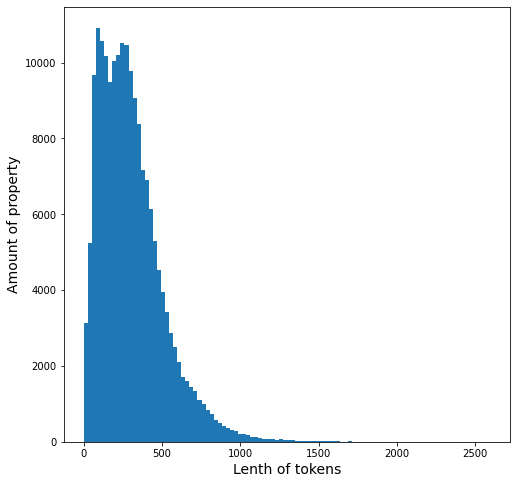

In [16]:
plt.figure(figsize=(8,8))
plt.hist(UK_2019sale_month67['len_description'],bins=100)
plt.ylabel('Amount of property', color = 'black',fontsize=14) 
plt.xlabel('Lenth of tokens', color = 'black',fontsize=14) 

## TF-IDF

In [ ]:
# first there are many "stop_word" which will be ignored in the TF-IDF calculating, 
# these lists are created manually from the trial of tf-idf calculating, 
# those "very frequently" terms and some meaningless terms were selected as "stop word"
# with more effort put in the stop_word list creating, the TF-IDF score calculating will be more accurate

In [153]:
extended_stopwords = ['bedroom', 'property', 'door', 'rear', 'front', 'two',
       'window', 'kitchen', 'double', 'room', 'area',
       'bathroom', 'upvc_double_glaze', 'large', 'offer', 'side', 'access',
       'window_front', 'space', 'lead', 'also',
       'double_glaze_window', 'include', 'three', 'home',
       'floor', 'house', 'fit', 'aspect', 'one', 'provide', 'feature', 'unit', 'dining_room',
       'open', 'upvc', 'window_side', 'suite', 'road', 'wall', 'door_lead', 'double_glazed', 'well', 'benefit',
       'view', 'light', 'bedroom_one', 'range', 'outside',
       'first_floor', 'storage', 'living_room',
        'separate', 'locate', 'double_glaze',
        'shower_room', 'point', 'private',
        'throughout',
       'accommodation', 'single', 'family', 'ground_floor', 'close',
       'power_point', 'build', 'bay_window', 'apartment', 
       'hallway', 'family_home', 'within', 'front_aspect',
       'entrance_hall', 'rear_elevation', 'location', 'shower',
        
        'four', 'situate', 'set',
        'development', 'wall_mount',
        'enclose', 'living', 'find', 
       'din_room', 'via', 'surround', 'electric', 'build_wardrobe', 'back', 'property_benefit',
       'utility', 'four_bedroom', 'comprise', 'along', 
       'new', 'main', 'flooring', 'boast', 'fit_kitchen', 'extend', 'suite_shower', 'entrance',
       'plus', 'landing', 'level', 'two_double_glaze',
       'second', 'study', 'hall',
       'ceiling', 'downstairs', 'well_present', 'overlook', 'local',
       'give_access', 'patio_door',
       'additional', 'kitchen_breakfast','mile',
      'fit_carpet', 'make', 'look', 'centre',
       'service', 'entrance_door',
       'bedroom_double_glaze', 'kitchen_diner', 'onto', 'tile_floor',
       'available', 'white', 'whilst', 'face', 'part',
       'stair', 'fitted', 'flat',
       
        'stair_first_floor', 'provide_access', 'panel',
       'side_aspect',  'radiator_double_glaze', 'station', 'sit_room',
       'amenity', 'second_floor',
        'modern_fit', 'front_elevation', 
        'far', 'wall_base_unit',
       'double_glazing', 'complete', 'bay', 'sale',
       'family_room', 'bath', 'inset', 'use', 'size',
       'many', 'street', 'impressive', 'range_wall_base', 'rail',
        'loft_access', 'detach', 'max_max', 'car',
       'also_benefit', 'give', 'office', 'externally', 
       'drive', 'built', 'max', 
       'window_overlook', 'link', 'sink', 'first_floor_landing',
       'glaze_window', 'reception', 'heating', 'fit_range',
       'chain', 'lounge_din',  'recess', 'appliance', 'border',
       'low_level', 'finish', 'land', 'bed', 'store', 
        'facility',
       'built_wardrobe',  'hand_basin', 'stair_lead',
        'upstairs', 'ground', 'market', 'coving', 'addition',
       'lighting', 'buyer', 'position', 
       'furniture']

In [ ]:
list_2 =['have_not_test','fit_wardrobe','part_tile','wall_and_base_unit','range_wall',
 'obscure','may','porch','suite_comprise','shower_over','purchase', 'gas_fire',
 'space_and_plumbing', 'potential','seller','panel_bath','brick','breakfast'
 'internal','any_representation_warranty','sink_and_drainer',
 'mixer_tap', 'work_surface','towards', 'under_stair_storage_cupboard',
 'glazing', 'must_verify_the_dimension_carefully','none_rely_upon_statement','prospective_buyer_only','market_this',
 'before_order_carpet','fixture_and_fitting_other','low',
 'would_make','low_flush','detach_bungalow',
 'please','move',
 'white_suite_comprising',
 'shape',
 'workshop',
 'fitting',
 'selection',
 'any_apparatus_equipment_fixture',
 'television_point','block','floor_plan','substantial',
 'extension',
 'pave',
 'half',
 'fitted_wardrobe','wardrobe'
 'time',
 'information',
 'across',
 'approximately',
 'junction',
 'detached',
 'opening',
 'various',
 'efficiency_give_all_measurement',
 'representation_fact_any',
 'than_those_mention_agree','situate_within',
 'water','estate',
 'housing','can_not', 'you_can',
 'electric_fire',
 'it_own',
 'locate_within',
 'choice','build_storage_cupboard','storage_cupboard','air_cupboard',
 'share','walk_distance','within_walk_distance','easy_access','within_easy_reach','family_bathroom','master_bedroom','master',
 'guide_price',
 'serve',
 'internally',
 'advise_that_some',
 'require_clarification_further_information',
 'not_precise_please',
 'particular_may_await',
 'vendor_approval_you',
 'period',
 'buy',
 'open_onto',
 'please_contact_especially_you', 'you_will_find',
 'have_take_guide',
 'variety',
 'step','slide_door','detach_family','viewing',
 'quality',
 'drainer',
 'stun',
 'gas_hob',
 'entrance_porch', 'cupboard_housing',
 'offering',
 'ensuite',
 'detail',
 'lane','velux_window', 'can_find', 'approximate','place',
 'building','cottage','sit',
 'base',
 'stone', 'call',
 'make_our_sale_particular',
 'present',
 'way',
 'enclosed',
 'power',
 'incorporate',
 'staircase','create',
 'space_for_fridge_freezer',
 'sink_unit',
 'stainless_steel_sink',
 'gate','any_point','three_piece','internal','fully']

In [ ]:
update_extend_list=[ 'roof', 'guarantee_their_operating_ability','limit_nor_any', 'service_system_and_appliance_list', 'any_built_furniture',
 'size_only_intend','general_guidance_you','price','resident','externally_there','currently','this_specification','top','you_will',
 'it_employee_agent','stair_rise', 'range_base', 'hob', 'without', 'first_time_buyer', 'away', 'suite_comprising', 'together',
 'offer_for_sale', 'low_maintenance', 'beautifully_present', 'extractor', 'shelving','offer_purchase_these', 'secure', 'high',
 'but_not_constitute','matter_refer_these_particular','whatever_relation_this','would_ask_for_your_operation', 'sash_window', 'would','require','system', 'picture_rail','have_any_authority', 'match', 'lead_out',
 'make_give',
 'which_particular_importance',
 'sell', 'bedroom_semi_detached','third',
 'heart',
 'integrate',
 'right',
 'useful',
 'one_and_half_bowl',
 'glass',
 'drawer',
 'tile_splash_back',
 'power_and_light',
 'guest',
 'any_contract',
 'you_please_contact',
 'order_that_there',
 'agent',
 'will_delay_agree',
 'mature',
 'office_and_will',
 'identification_documentation_late_stage', 'corner','purchaser_will_ask_produce',
 'opaque',
 'particular_issue_good_faith', 'any_offer_contract',
 'property_accordingly_strongly',
 'any_the_equipment_appliance',
 'report_before_finalise_their', 'their_own_survey_service',
 'service_please_note',
 'please_check_the_position',
 'you_especially_you_contemplate', 'should_independently_verify_prospective',
 'advise_prospective_buyer_commission']

In [154]:
real_estate_stopwords = [
    "area",
    
    "location",
    "plot",
    "hectare",
    "m²",
    "m2",
    "sq",
    "sale",
    "square",
    "meter",
    "bedroom",
    "bathroom",
    "room",
    "living",
    "kitchen",
    "hallway",
    "corridor",
    "dining",
    "apartment",
    "flat",
    "double",
    "two",
    "three",
    "property","also","include","four",
    'door', 'window', 'side', 'home', 'house', 'max_max', 'bungalow',
    'rear', 'front', 'floor', 'aspect', 'unit', 'well', 'within', 'whilst', 'access_via', 'ask_operation_order_delay','check_position_especially_contemplate'
    ,'documentation_late_stage_would','first_floor_three','first','lounge_double_glaze','low_level_wash_hand','max_max_max_max','need','number',
    'please_contact_office_please','point_particular_importance','purchaser_ask_produce_identification','side_elevation','take','three_bedroom',
    'three_double_glaze','upvc_double_glazing','vinyl_flooring','year','window_face','wash_hand_basin','telephone_point','tap','strongly_advise_prospective_buyer',
    'stage_would_ask_operation','room_size_intend','regulation_intend_purchaser_ask', 'representation_fact_form_part','produce_identification_documentation_late',
    'property_measurement_approximate','particular_independently_verify_prospective','offer_contract_matter_refer','make_give_representation_warranty',
    'limit_employee_agent_authority','general_guidance_must_verify','full','fully_enclose', 'fully_fit','fixture_fitting_mention_agree','finalise_offer_purchase_particular',
    'equipment_appliance_property_accordingly', 'equipment_fixture_fitting_service','come', 'commission_survey_service_report','comprises',
 'comprising', 'connect','continue','could','cover','buyer_tenant_neither_sequence','access_loft', 'accommodation_comprise', 'accommodation_comprises','adjacent',
 'allow', 'amenity_include','another','approx', 'around','base_unit', 'base_wall','benefit_include', 'beyond','extensive','external','end','five','live',
 'live_room','there_also','upvc_double','benefit_from'
    ]+extended_stopwords+update_extend_list+list_2

In [155]:
stopword_list_new = list(stopword_list)

In [156]:
stopword_list_new.extend(real_estate_stopwords)

In [157]:
len(stopword_list_new)

721

In [20]:
# make corpus
corpus = UK_2019sale_month67.tri_gram_token.fillna(' ').values

### model_0

In [124]:
# make the doc-term matrix
tfidf_0 = TfidfVectorizer(max_df=.95, min_df=0.05, stop_words=stopword_list_new,use_idf=True, ngram_range=(1,1), norm=None, max_features=300)

In [125]:
# Fit and Transform the documents
matrix_0 = tfidf_0.fit_transform(corpus)   


In [126]:
matrix_0_as_array = matrix_0.toarray()


In [127]:
matrix_0_as_array.shape

(186466, 173)

In [128]:
table_0 = pd.DataFrame(matrix_0_as_array,
                        columns=tfidf_0.get_feature_names())


In [133]:
table_0.sum().sort_values(ascending=False).head(50)

radiator               773705.270373
garden                 528903.248108
upvc_double            436075.817500
lounge                 261617.141096
garage                 229113.994101
modern                 216163.537056
spacious               189472.759661
glaze                  173311.270170
family_bathroom        159455.677856
park                   158563.368896
conservatory           156470.500255
benefit_from           154610.300674
village                144601.794682
driveway               142413.920369
master_bedroom         137095.560879
laminate_flooring      134756.892742
tile                   134726.210263
carpet                 127217.060480
elevation              126989.689150
patio                  123034.655776
good_size              120065.992015
utility_room           119559.127171
lawn                   117162.671016
parking                116697.578847
storage_cupboard       116241.641320
reception_room         115222.448081
cupboard               114555.040869
f

### model_2

In [28]:
# make the doc-term matrix
tfidf_2 = TfidfVectorizer(max_df=.95, min_df=0.025, stop_words=stopword_list_new,use_idf=False, ngram_range=(1,1), norm=None, max_features=300)

In [29]:
# Fit and Transform the documents
matrix_2 = tfidf_2.fit_transform(corpus)  

In [30]:
# Fit and Transform the documents
#matrix_2 = tfidf_2.fit_transform(corpus)  
matrix_2_as_array = matrix_2.toarray()
matrix_2_as_array.shape

(186466, 300)

In [35]:
table_1 = pd.DataFrame(matrix_1_as_array,
                        columns=tfidf_1.get_feature_names())

In [36]:
df = pd.DataFrame(table_1.sum().sort_values(ascending=False))
pd.set_option('display.max_rows', 300)

In [39]:
df

,0
garden,420426.0
radiator,380893.0
lounge,152635.0
modern,103960.0
garage,103669.0
spacious,90887.0
family_bathroom,75931.0
park,66508.0
glaze,61925.0
driveway,56887.0


In [40]:
table_2 = pd.DataFrame(matrix_2_as_array,
                        columns=tfidf_2.get_feature_names())

In [42]:
df2 = pd.DataFrame(table_2.sum().sort_values(ascending=False))

In [43]:
extend_list = df2.index.to_list()

In [168]:
np.set_printoptions(threshold=np.inf)

In [44]:
extend_list


['garden',
 'radiator',
 'lounge',
 'modern',
 'garage',
 'spacious',
 'family_bathroom',
 'park',
 'glaze',
 'driveway',
 'master_bedroom',
 'conservatory',
 'village',
 'tile',
 'ceiling_light',
 'patio',
 'parking',
 'lawn',
 'central_heating_radiator',
 'good_size',
 'storage_cupboard',
 'laminate_flooring',
 'utility_room',
 'reception_room',
 'french_door',
 'school',
 'cupboard',
 'excellent',
 'enjoy',
 'carpet',
 'open_plan',
 'elevation',
 'town',
 'have_not_test',
 'gate',
 'basin',
 'lovely',
 'tile_flooring',
 'popular',
 'ideal',
 'cloakroom',
 'great',
 'beautiful',
 'wardrobe',
 'attractive',
 'patio_area',
 'walk',
 'gas_central_heating',
 'town_centre',
 'communal',
 'fit_wardrobe',
 'off_road_parking',
 'generous',
 'small',
 'extractor_fan',
 'part_tile',
 'good',
 'wall_and_base_unit',
 'shop',
 'boiler',
 'nearby',
 'fantastic',
 'glazed',
 'carpet_flooring',
 'range_wall',
 'obscure',
 'style',
 'perfect',
 'wooden',
 'master',
 'shed',
 'any_point',
 'loft',
 't

In [151]:
list_2 =['have_not_test','fit_wardrobe','part_tile','wall_and_base_unit','range_wall',
 'obscure','may','porch','suite_comprise','shower_over','purchase', 'gas_fire',
 'space_and_plumbing', 'potential','seller','panel_bath','brick','breakfast'
 'internal','any_representation_warranty','sink_and_drainer',
 'mixer_tap', 'work_surface','towards', 'under_stair_storage_cupboard',
 'glazing', 'must_verify_the_dimension_carefully','none_rely_upon_statement','prospective_buyer_only','market_this',
 'before_order_carpet','fixture_and_fitting_other','low',
 'would_make','low_flush','detach_bungalow',
 'please','move',
 'white_suite_comprising',
 'shape',
 'workshop',
 'fitting',
 'selection',
 'any_apparatus_equipment_fixture',
 'television_point','block','floor_plan','substantial',
 'extension',
 'pave',
 'half',
 'fitted_wardrobe','wardrobe'
 'time',
 'information',
 'across',
 'approximately',
 'junction',
 'detached',
 'opening',
 'various',
 'efficiency_give_all_measurement',
 'representation_fact_any',
 'than_those_mention_agree','situate_within',
 'water','estate',
 'housing','can_not', 'you_can',
 'electric_fire',
 'it_own',
 'locate_within',
 'choice','build_storage_cupboard','storage_cupboard','air_cupboard',
 'share','walk_distance','within_walk_distance','easy_access','within_easy_reach','family_bathroom','master_bedroom','master',
 'guide_price',
 'serve',
 'internally',
 'advise_that_some',
 'require_clarification_further_information',
 'not_precise_please',
 'particular_may_await',
 'vendor_approval_you',
 'period',
 'buy',
 'open_onto',
 'please_contact_especially_you', 'you_will_find',
 'have_take_guide',
 'variety',
 'step','slide_door','detach_family','viewing',
 'quality',
 'drainer',
 'stun',
 'gas_hob',
 'entrance_porch', 'cupboard_housing',
 'offering',
 'ensuite',
 'detail',
 'lane','velux_window', 'can_find', 'approximate','place',
 'building','cottage','sit',
 'base',
 'stone', 'call',
 'make_our_sale_particular',
 'present',
 'way',
 'enclosed',
 'power',
 'incorporate',
 'staircase','create',
 'space_for_fridge_freezer',
 'sink_unit',
 'stainless_steel_sink',
 'gate','any_point','three_piece','internal','fully']

In [56]:
len(list_2)

128

In [58]:
# manually create the "keyword_list" which are the most important words and will be used in the hierarchical clustering analysis
keyword_list = df2[~ df2.index.isin(list_2)]

## Word2Vector

In [12]:
from gensim.models.word2vec import Word2Vec

In [200]:
# now train word2vec model again use the tri_grams stuff
Model_tri= Word2Vec(UK_2019sale_month67['tri_gram_token_list'],min_count=10,workers=1, window=5,vector_size=200)
# Model_adjust_bi.save("sale_UK_year19_month67_gdf_sample_1_adjust_bi.bin")
# Model_tri = Word2Vec.load('sale_UK_year19_month67_sample_word2vec0616.bin')



In [202]:
Model_tri.save("UK_2019sale_month67_w2v_0726.bin")

In [13]:
Model_tri = Word2Vec.load("UK_2019sale_month67_w2v_0726.bin")

In [104]:
Model_tri.wv.most_similar('victoria_park',topn=5)

[('queen_park', 0.7548860907554626),
 ('sefton_park', 0.6745736598968506),
 ('brockwell_park', 0.669364869594574),
 ('richmond_park', 0.6686849594116211),
 ('regent_park', 0.6614158153533936)]

In [64]:
w2v_df = pd.DataFrame(Model_tri.wv[Model_tri.wv.index_to_key])

In [65]:
w2v_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.063324,-1.270741,0.238187,-2.703316,-0.482052,-0.764510,-0.930273,1.524869,-0.793628,-0.866807,...,-0.403235,0.197187,3.461885,0.522632,2.513227,2.069793,1.075377,1.709512,-0.601960,1.693549
1,0.773161,-0.872301,0.136002,-3.008910,-0.036758,-1.265666,-1.329464,0.164655,-0.684589,0.431025,...,0.726647,-0.801569,2.406866,-0.811067,1.425947,0.146761,0.728110,0.812278,-0.704460,2.121088
2,0.714653,-1.028881,0.218599,-2.826912,-0.479869,-1.310078,-1.792578,-0.175284,-0.559503,-1.119303,...,-0.776571,-1.598953,2.096685,0.011248,2.606774,0.437902,0.962616,-0.601716,0.708248,0.788425
3,2.469648,-2.649287,0.101272,-2.117103,-1.365481,1.047083,0.045968,-1.821844,0.949008,-0.804518,...,-1.516014,0.043570,1.725658,-0.560326,-0.380371,-0.182487,1.286190,-0.803868,-0.503464,1.262370
4,2.297479,2.166436,3.027315,-2.625712,-0.465660,-1.097670,0.144167,0.184807,-1.312408,-0.000681,...,-1.839215,0.879404,0.779008,-0.220693,2.568326,-0.748742,0.707063,2.862225,1.152450,1.788613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49931,-0.095159,0.013373,-0.022877,0.016542,0.052149,-0.126319,0.058878,0.047070,0.035704,-0.036152,...,0.034659,-0.081545,-0.048411,0.023896,-0.000589,0.044718,-0.012382,0.030445,-0.101082,-0.086407
49932,-0.125056,0.055992,-0.129528,0.082436,0.051630,-0.040432,-0.020064,0.023107,0.111032,0.065190,...,0.093002,-0.167834,0.056575,-0.003198,-0.016649,0.000127,-0.082364,-0.000085,-0.066294,-0.012928
49933,-0.033447,0.124045,0.054114,0.139158,0.037219,-0.022464,0.032610,0.006576,0.016652,-0.037925,...,-0.016789,-0.070070,-0.108494,0.007070,-0.162750,-0.061591,-0.103037,-0.150578,-0.044406,-0.141685
49934,-0.091960,0.056573,-0.059810,-0.010441,0.098456,0.226890,-0.042855,-0.118660,-0.044810,-0.061610,...,0.122991,0.066380,0.040943,-0.060067,0.025161,-0.005660,-0.183793,0.066534,-0.054766,-0.002152


In [66]:
w2v_df = w2v_df.set_index([Model_tri.wv.index_to_key])

In [67]:
w2v_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
the,0.063324,-1.270741,0.238187,-2.703316,-0.482052,-0.764510,-0.930273,1.524869,-0.793628,-0.866807,...,-0.403235,0.197187,3.461885,0.522632,2.513227,2.069793,1.075377,1.709512,-0.601960,1.693549
and,0.773161,-0.872301,0.136002,-3.008910,-0.036758,-1.265666,-1.329464,0.164655,-0.684589,0.431025,...,0.726647,-0.801569,2.406866,-0.811067,1.425947,0.146761,0.728110,0.812278,-0.704460,2.121088
with,0.714653,-1.028881,0.218599,-2.826912,-0.479869,-1.310078,-1.792578,-0.175284,-0.559503,-1.119303,...,-0.776571,-1.598953,2.096685,0.011248,2.606774,0.437902,0.962616,-0.601716,0.708248,0.788425
bedroom,2.469648,-2.649287,0.101272,-2.117103,-1.365481,1.047083,0.045968,-1.821844,0.949008,-0.804518,...,-1.516014,0.043570,1.725658,-0.560326,-0.380371,-0.182487,1.286190,-0.803868,-0.503464,1.262370
rear,2.297479,2.166436,3.027315,-2.625712,-0.465660,-1.097670,0.144167,0.184807,-1.312408,-0.000681,...,-1.839215,0.879404,0.779008,-0.220693,2.568326,-0.748742,0.707063,2.862225,1.152450,1.788613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
esque,-0.095159,0.013373,-0.022877,0.016542,0.052149,-0.126319,0.058878,0.047070,0.035704,-0.036152,...,0.034659,-0.081545,-0.048411,0.023896,-0.000589,0.044718,-0.012382,0.030445,-0.101082,-0.086407
juice,-0.125056,0.055992,-0.129528,0.082436,0.051630,-0.040432,-0.020064,0.023107,0.111032,0.065190,...,0.093002,-0.167834,0.056575,-0.003198,-0.016649,0.000127,-0.082364,-0.000085,-0.066294,-0.012928
lancings,-0.033447,0.124045,0.054114,0.139158,0.037219,-0.022464,0.032610,0.006576,0.016652,-0.037925,...,-0.016789,-0.070070,-0.108494,0.007070,-0.162750,-0.061591,-0.103037,-0.150578,-0.044406,-0.141685
descriptionprice,-0.091960,0.056573,-0.059810,-0.010441,0.098456,0.226890,-0.042855,-0.118660,-0.044810,-0.061610,...,0.122991,0.066380,0.040943,-0.060067,0.025161,-0.005660,-0.183793,0.066534,-0.054766,-0.002152


## Hierarchical cluster

In [59]:
keyword_list

,0
garden,420426.0
radiator,380893.0
lounge,152635.0
modern,103960.0
garage,103669.0
spacious,90887.0
family_bathroom,75931.0
park,66508.0
glaze,61925.0
driveway,56887.0


In [69]:
# the 173 important words that can represent the property features and their word2vec vectors
w2v_df[w2v_df.index.isin(keyword_list.index)]

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
garden,0.606850,-2.089157,-1.671508,-3.579295,-1.951631,-2.079040,0.680913,2.206724,-0.545733,-2.670664,...,-1.331047,-2.072192,5.021315,-2.265613,2.697066,2.799550,-1.180766,-1.253981,0.797873,0.160868
radiator,3.815152,2.828646,-1.474331,-2.915249,1.152720,-0.609561,-0.995397,-0.870974,-0.511775,-0.981745,...,-1.267436,-1.145214,-0.026152,-1.370341,1.717195,-3.887637,2.065809,-1.199986,0.345786,-0.705820
lounge,0.938124,0.861157,-2.061193,0.786289,-1.346410,-1.314032,-0.765888,1.957480,-1.132375,-0.072500,...,-0.759789,-1.733606,6.816613,-0.692994,-0.214709,0.676847,3.642584,0.148225,0.680686,2.150607
modern,1.891189,-2.478600,-2.091949,-1.153794,-2.091977,-2.197807,-1.443315,1.478108,-1.405861,2.061943,...,-0.982124,-2.492136,3.771320,-0.614036,0.410199,1.519707,2.232645,-0.148743,-1.084184,2.416193
garage,-3.113425,-3.167334,1.359483,-3.867728,-1.763778,-2.897104,0.009565,1.122456,0.073000,-1.150170,...,-2.490940,-1.385804,0.921257,-2.593454,0.938554,-0.152624,-1.535682,0.457849,0.915891,1.487172
spacious,-0.420943,-1.575660,-1.483954,-0.516113,-2.690278,-1.464364,1.246558,2.034071,1.181577,2.357481,...,-0.935345,-1.418788,5.221437,-1.259995,-0.257263,-0.637661,2.099950,-0.281684,0.043481,2.318331
family_bathroom,4.017368,-2.618405,0.157331,-2.173552,-3.683269,0.058376,-5.054421,-3.404231,3.125593,1.777879,...,-5.368971,-2.029526,1.550886,-0.174020,2.389481,-0.734265,-4.595932,1.055394,-0.648692,0.716312
park,-2.407514,-1.441602,2.287619,-1.836000,-4.520349,0.607564,1.272517,3.740490,0.305080,-0.772394,...,-1.419894,1.547374,0.214168,-2.257901,0.881956,0.969203,-1.203301,1.305767,-0.315284,1.076618
glaze,3.637064,-3.093211,5.318450,1.399857,-0.914196,-2.631389,-2.105834,0.168729,-1.304893,-0.408223,...,4.611068,-0.829499,0.894061,-2.078716,2.199150,-0.501434,2.505280,0.723518,0.524343,0.208963
driveway,0.321777,2.392456,-0.355559,-0.662340,-2.112546,-0.969038,-0.035944,0.834674,0.800835,1.059853,...,-3.086541,-1.356769,-0.016924,-0.866536,1.014946,1.336328,-2.583524,1.719465,1.990473,1.329817


In [76]:
keyword_vecor = w2v_df.loc[keyword_list.index]

### dimension reduction

In [72]:
# since there are 200 dimensions which are not proper for clustering, we need to reduce the dimensions by UMAP 
dmeasure = 'euclidean' # distance metric
rdims    = 4 # r-dims == Reduced dimensionality
print(f"UMAP dimensionality reduction to {rdims} dimensions with '{dmeasure}' distance measure.")

UMAP dimensionality reduction to 4 dimensions with 'euclidean' distance measure.


In [75]:
reducer = umap.UMAP(
    n_neighbors=25,
    min_dist=0.01,
    n_components=rdims,
    random_state=42)

In [77]:
# Reduces our feature vectors for each thesis down to n dimensions
embedded = reducer.fit_transform(keyword_vecor)

In [78]:
# Create a dictionary that is easily converted into a pandas df
embedded_dict = {}
for i in range(0,embedded.shape[1]):
    embedded_dict[f"Dim {i+1}"] = embedded[:,i] # D{dimension_num} (Dim 1...Dim n)

In [81]:
keyword_reduced_vector = pd.DataFrame(embedded_dict, index=keyword_vecor.index)

In [82]:
keyword_reduced_vector

,Dim 1,Dim 2,Dim 3,Dim 4
garden,5.399380,4.500754,6.359685,5.249011
radiator,7.205684,4.387468,4.700121,3.085147
lounge,5.823611,5.445687,5.209016,4.044065
modern,5.031761,5.277272,5.032824,4.592819
garage,5.144842,4.672708,6.728073,4.912956
spacious,4.953572,5.234371,5.666779,4.533378
family_bathroom,4.911959,5.371996,5.897375,4.683243
park,4.446313,4.142013,7.235768,5.703867
glaze,6.567858,4.683503,4.670748,3.485391
driveway,4.854228,4.361588,6.865060,5.386926


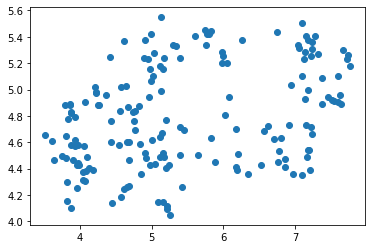

In [83]:
plt.scatter(keyword_reduced_vector['Dim 1'],keyword_reduced_vector['Dim 2'])

In [86]:
# standadize data
scaler = SS()

In [87]:
keyword_standardized = scaler.fit_transform(keyword_reduced_vector)

In [88]:
keyword_standardized

array([[-6.01562746e-02, -7.56397367e-01,  1.01753378e+00,
         2.10558400e-01],
       [ 1.39107454e+00, -1.05344152e+00, -1.57061851e+00,
        -1.23171735e+00],
       [ 2.80681819e-01,  1.72127473e+00, -7.76977777e-01,
        -5.92571735e-01],
       [-3.55510443e-01,  1.27968013e+00, -1.05175555e+00,
        -2.26811588e-01],
       [-2.64658302e-01, -3.05525512e-01,  1.59204888e+00,
        -1.34315845e-02],
       [-4.18329418e-01,  1.16719091e+00, -6.30796850e-02,
        -2.66430736e-01],
       [-4.51762855e-01,  1.52805269e+00,  2.96544284e-01,
        -1.66541427e-01],
       [-8.25874209e-01, -1.69703901e+00,  2.38381863e+00,
         5.13732970e-01],
       [ 8.78629267e-01, -2.77220041e-01, -1.61642635e+00,
        -9.64943767e-01],
       [-4.98145521e-01, -1.12130129e+00,  1.80568564e+00,
         3.02482724e-01],
       [-2.77977645e-01,  1.99033475e+00, -8.32027271e-02,
        -1.59260049e-01],
       [ 4.64707702e-01,  1.07475281e+00, -4.85923916e-01,
      

In [90]:
keyword_vector_standardized = pd.DataFrame(keyword_standardized, columns=keyword_reduced_vector.columns, index=keyword_reduced_vector.index)

In [91]:
keyword_vector_standardized

,Dim 1,Dim 2,Dim 3,Dim 4
garden,-0.060156,-0.756397,1.017534,0.210558
radiator,1.391075,-1.053442,-1.570619,-1.231717
lounge,0.280682,1.721275,-0.776978,-0.592572
modern,-0.355510,1.279680,-1.051756,-0.226812
garage,-0.264658,-0.305526,1.592049,-0.013432
spacious,-0.418329,1.167191,-0.063080,-0.266431
family_bathroom,-0.451763,1.528053,0.296544,-0.166541
park,-0.825874,-1.697039,2.383819,0.513733
glaze,0.878629,-0.277220,-1.616426,-0.964944
driveway,-0.498146,-1.121301,1.805686,0.302483


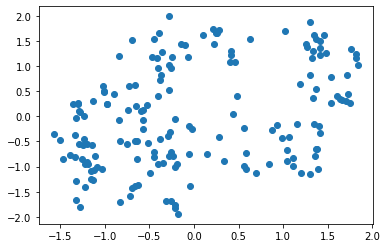

In [92]:
plt.scatter(keyword_vector_standardized['Dim 1'],keyword_vector_standardized['Dim 2'])

### Cluster

In [93]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [94]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [95]:
labels= keyword_vector_standardized.index

In [96]:
cluster_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [97]:
cluster_model = cluster_model.fit(keyword_vector_standardized)

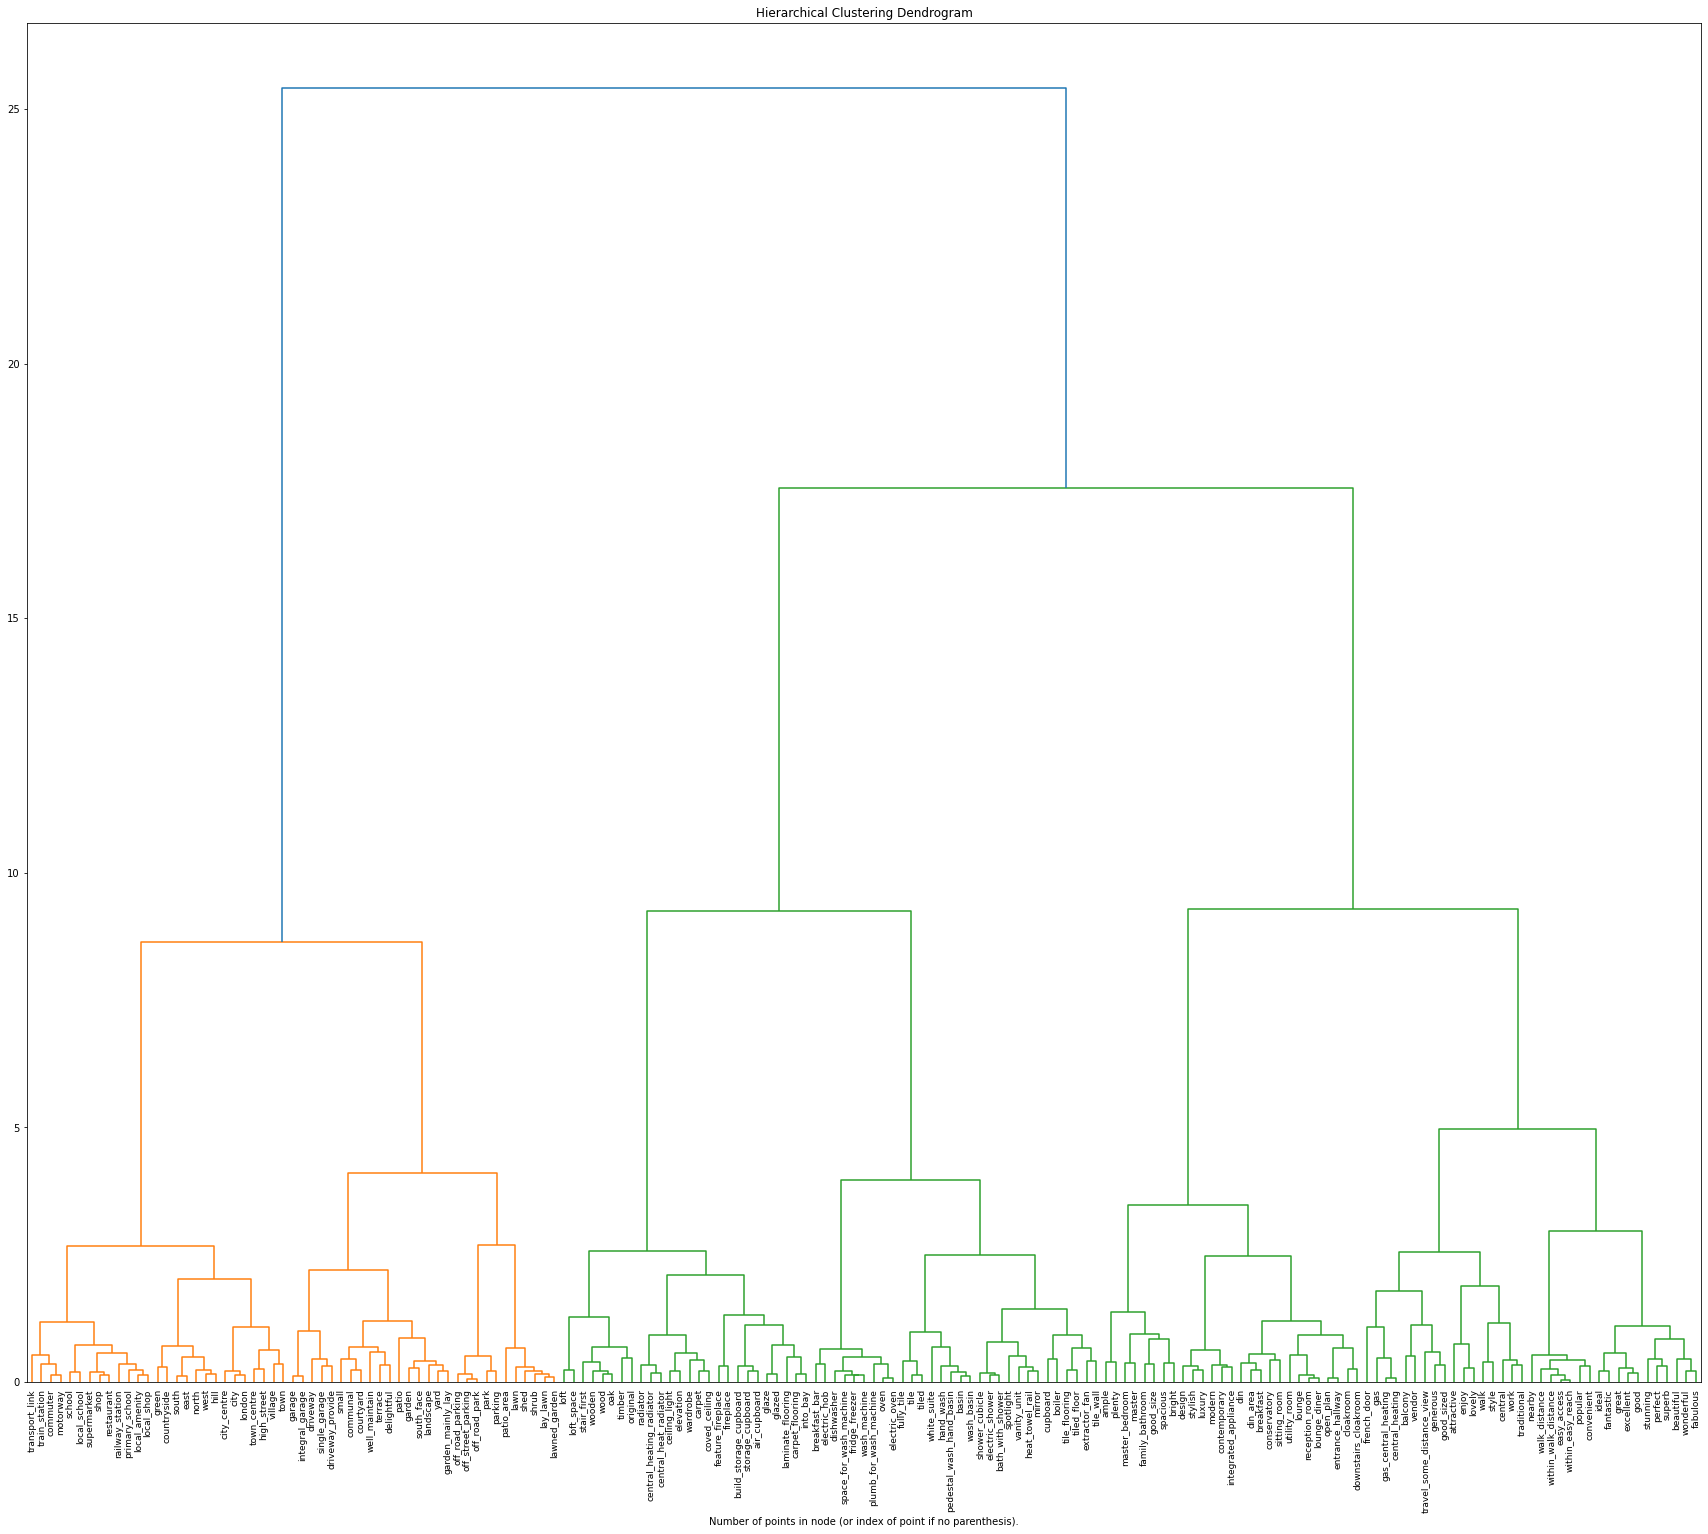

In [98]:
plt.figure(figsize=(30, 25))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(cluster_model, truncate_mode="level", p=16,labels=labels,leaf_rotation=90.,leaf_font_size=9.)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig('Hierarchical_clustering.pdf')

## Replace

In [152]:
# make the doc-term matrix
tfidf_3 = TfidfVectorizer(max_df=.99, min_df=0.001, stop_words=stopword_list_new,use_idf=False, ngram_range=(1,1), norm=None,max_features=500)

In [153]:
# Fit and Transform the documents
matrix_3 = tfidf_3.fit_transform(corpus)  
matrix_3_as_array = matrix_3.toarray()
matrix_3_as_array.shape

(186466, 500)

In [154]:
table_3 = pd.DataFrame(matrix_3_as_array,
                        columns=tfidf_3.get_feature_names())

In [155]:
list_for_replace = table_3.columns.to_list()

In [214]:
list_for_replace

['accurate_and_reliable_however',
 'across',
 'add',
 'adjoin',
 'advise_that_some',
 'air_cupboard',
 'ample',
 'ample_space',
 'any_apparatus_equipment_fixture',
 'any_other_medium',
 'any_point',
 'any_representation_warranty',
 'any_website_online',
 'approach',
 'approximate',
 'approximately',
 'attic',
 'attractive',
 'avenue',
 'balcony',
 'bar',
 'base',
 'base_level',
 'basin',
 'bath_with_shower',
 'beach',
 'beautiful',
 'before_order_carpet',
 'benefit_from_gas_central',
 'block',
 'block_pave_driveway',
 'board',
 'boiler',
 'boundary',
 'breakfast',
 'breakfast_bar',
 'brick',
 'brick_build',
 'bright',
 'build_cupboard',
 'build_storage_cupboard',
 'building',
 'bus_route',
 'buy',
 'cabinet',
 'call',
 'can_find',
 'can_not',
 'carpet',
 'carpet_flooring',
 'ceiling_light',
 'ceiling_spotlight',
 'cellar',
 'central',
 'central_heat_radiator',
 'central_heating',
 'central_heating_radiator',
 'character',
 'charm',
 'choice',
 'chrome_heat_towel_rail',
 'church',
 'cit

In [117]:
pd.options.display.max_colwidth=50

In [111]:
UK_2019sale_month67.head(1)

Unnamed: 0  listing_id      property_type  start_date    end_date  \
0           0    51803281  Detached bungalow  2019-06-19  2019-07-18   

   price_last  price_flag  num_bed_last  bed_flag  num_floors_max  ...  \
0      265000           1             3         1               0  ...   

   nuts118cd  nuts118nm  \
0        UKM   Scotland   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [112]:
# create a new colomn containing the tokens after replacing
UK_2019sale_month67['tri_gram_replaced'] = UK_2019sale_month67.tri_gram_token

In [114]:
UK_2019sale_month67.head(2)

Unnamed: 0  listing_id      property_type  start_date    end_date  \
0           0    51803281  Detached bungalow  2019-06-19  2019-07-18   
1           1    51740789               Flat  2019-06-19  2019-07-06   

   price_last  price_flag  num_bed_last  bed_flag  num_floors_max  ...  \
0      265000           1             3         1               0  ...   
1       62000           1             2         1               0  ...   

   nuts118nm  \
0   Scotland   
1   Scotland   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [115]:
UK_2019sale_month67.tri_gram_replaced.fillna(' ',inplace=True)

### positive_adj

In [119]:
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bstunning\b|\bfabulous\b|\bgorgeous\b|\bsuperb\b|\bamazing\b|\bfantastic\b|\bwonderful\b|\bperfect\b|\bideal\b|\bgood\b|\bexcellent\b|\bgreat\b|\blovely\b|\battractive\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,0,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
1,1,51740789,Flat,2019-06-19,2019-07-06,62000,1,2,1,0,...,Scotland,two bedroom flatmassive discount from home rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",692,692,two bedroom flatmassive discount from home rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",two bedroom flatmassive discount from home_rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",two bedroom flatmassive discount from home_rep...
2,2,52216410,Flat,2019-07-27,2019-10-31,195000,2,2,1,0,...,Scotland,treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",148,148,treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",treemendous beechgrove gorgeous two bedroom pr...
3,3,51989870,Flat,2019-07-06,2019-10-10,60000,1,2,1,0,...,Scotland,ground floor flatexcellent opportunity for the...,"['ground', 'floor', 'flatexcellent', 'opportun...",504,504,ground floor flatexcellent opportunity for the...,"['ground', 'floor', 'flatexcellent', 'opportun...",ground_floor flatexcellent opportunity for the...,"['ground_floor', 'flatexcellent', 'opportunity...",ground_floor flatexcellent opportunity for the...
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,0,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186461,186461,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,1,...,East Midlands (England),exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",474,474,exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...
186463,186463,52189656,Terraced house,2019-07-25,2019-09-06,185000,1,3,1,0,...,East Midlands (England),sutton way always very popular when property c...,"['sutton', 'way', 'always', 'very', 'popular',...",393,393,sutton way always very popular when property c...,"['sutton', 'way', 'always', 'very', 'popular',...",sutton way always very_popular when property c...,"['sutton', 'way', 'always', 'very_popular', 'w...",sutton way always very_popular when property c...
186464,186464,52126406,Semi-detached house,2019-07-19,2019-08-06,230000,

In [196]:
regex_positive_adj  = re.compile(r'\bstunning\b|\bfabulous\b|\bgorgeous\b|\bsuperb\b|\bamazing\b|\bfantastic\b|\bwonderful\b|\bperfect\b|\bideal\b|\bgood\b|\bexcellent\b|\bgreat\b|\blovely\b|\battractive\b|\bwell_maintain\b|\bpopular\b|\bbeautiful\b|\bdelightful\b', flags=re.IGNORECASE)

In [197]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_positive_adj,'positive_adj',regex=True)

Wall time: 26.9 s


In [125]:
# test
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bstunning\b|\bfabulous\b|\bgorgeous\b|\bsuperb\b|\bamazing\b|\bfantastic\b|\bwonderful\b|\bperfect\b|\bideal\b|\bgood\b|\bexcellent\b|\bgreat\b|\blovely\b|\battractive\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced


In [130]:
# test
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bpositive_adj\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=4106)

81739    beautifully_present traditional three bedroom semi_detach_property situate desirable road leyland with positive_adj modern din kitchen and good_size rear garden early_viewing_essential order not_miss out this positive_adj home the property briefly_comprises_hallway lounge with feature bay_window modern din kitchen downstairs three bedroom four piece_suite family_bathroom well_present garden front and rear driveway lead single detached_garage positive_adj three bedroom semi_detach_family home desirable_location close balshaw high_school positive_adj din kitchen beautiful lounge with bay_window hallway downstairs four_piece white_suite family_bathroom good_size rear garden driveway lead garage hall upvc_double glaze external front door electric_meter cupboard radiator under_stair_storage housing_gas meter stair_lead first_floor lounge upvc_double glaze bay_window front radiator two wall light_point electric_fire with stone_hearth and surround dining kitchen upvc_double glaze_win

### school

In [139]:
list_for_replace

['accurate_and_reliable_however',
 'across',
 'advise_that_some',
 'air_cupboard',
 'ample',
 'ample_space',
 'any_apparatus_equipment_fixture',
 'any_other_medium',
 'any_point',
 'any_representation_warranty',
 'any_website_online',
 'approach',
 'approximate',
 'approximately',
 'attractive',
 'avenue',
 'balcony',
 'base',
 'base_level',
 'basin',
 'bath_with_shower',
 'beautiful',
 'before_order_carpet',
 'benefit_from_gas_central',
 'block',
 'block_pave_driveway',
 'boiler',
 'boundary',
 'breakfast',
 'breakfast_bar',
 'brick',
 'brick_build',
 'bright',
 'build_cupboard',
 'build_storage_cupboard',
 'building',
 'bus_route',
 'buy',
 'call',
 'can_find',
 'can_not',
 'carpet',
 'carpet_flooring',
 'ceiling_light',
 'central',
 'central_heat_radiator',
 'central_heating',
 'central_heating_radiator',
 'character',
 'charm',
 'choice',
 'chrome_heat_towel_rail',
 'church',
 'city',
 'city_centre',
 'cloakroom',
 'close_proximity',
 'combi_boiler',
 'communal',
 'commuter',
 'con

In [132]:
list_school = Model_tri.wv.most_similar('school',topn=30)

In [141]:
list_school[2][0]

'primary_and_secondary_school'

In [142]:
list_school_1=[]

In [143]:
for i in list_school:
    list_school_1.append(i[0])

In [156]:
[i for i in list_school_1 if i in list_for_replace]

['local_school', 'primary_school', 'secondary_school']

In [14]:
def word_for_replace(word):
    replace_list = []
    similar_words = Model_tri.wv.most_similar(word,topn=50)
    for i in similar_words:
        replace_list.append(i[0])
    final_replace_list = [i for i in replace_list if i in list_for_replace]
    return final_replace_list

In [16]:
word_for_replace('sea')

['beach', 'river']

In [164]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bschool\b|\bprimary_school\b|\bsecondary_school\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
6,6,52193691,Terraced house,2019-07-25,2019-12-04,90000,2,3,1,0,...,Scotland,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",285,285,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...
7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,0,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...
10,10,51753801,Flat,2019-06-19,2020-03-31,90000,3,2,1,0,...,Scotland,two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",491,491,two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",two bedroom flatthis two bedroom flat enjoy pr...
14,14,51731471,Flat,2019-06-19,2020-03-31,58000,3,1,1,0,...,Scotland,with sea view and generously proportion room p...,"['with', 'sea', 'view', 'and', 'generously', '...",262,262,with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186436,186436,52003691,Detached house,2019-07-07,2019-07-08,260000,1,3,1,0,...,East Midlands (England),main description freehold step stone delight o...,"['main', 'description', 'freehold', 'step', 's...",724,724,main description freehold step stone delight_o...,"['main', 'description', 'freehold', 'step', 's...",main description freehold step_stone delight_o...,"['main', 'description', 'freehold', 'step_ston...",main description freehold step_stone delight_o...
186437,186437,52168358,NaN,2019-07-23,2019-09-27,350000,2,3,1,0,...,East Midlands (England),stunning three bedroom stone semi detach home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",638,638,stunning three bedroom stone semi_detach home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",stunning three bedroom stone semi_detach_home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",positive_adj three bedroom stone semi_detach_h...
186447,186447,51768463,Terraced house,2019-06-19,2019-07-16,230000,1,3,1,0,...,East Midlands (England),let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",449,449,let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...
186452,186452,51784182,Terraced house,2019-06-19,2019-08-12,160000,2,2,1,

In [165]:
regex_school  = re.compile(r'\bschool\b|\bprimary_school\b|\bsecondary_school\b', flags=re.IGNORECASE)

In [166]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_school,'school',regex=True)

Wall time: 11.6 s


In [167]:
#test
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bschool\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
6,6,52193691,Terraced house,2019-07-25,2019-12-04,90000,2,3,1,0,...,Scotland,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",285,285,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...
7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,0,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...
10,10,51753801,Flat,2019-06-19,2020-03-31,90000,3,2,1,0,...,Scotland,two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",491,491,two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",two bedroom flatthis two bedroom flat enjoy pr...
14,14,51731471,Flat,2019-06-19,2020-03-31,58000,3,1,1,0,...,Scotland,with sea view and generously proportion room p...,"['with', 'sea', 'view', 'and', 'generously', '...",262,262,with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186436,186436,52003691,Detached house,2019-07-07,2019-07-08,260000,1,3,1,0,...,East Midlands (England),main description freehold step stone delight o...,"['main', 'description', 'freehold', 'step', 's...",724,724,main description freehold step stone delight_o...,"['main', 'description', 'freehold', 'step', 's...",main description freehold step_stone delight_o...,"['main', 'description', 'freehold', 'step_ston...",main description freehold step_stone delight_o...
186437,186437,52168358,NaN,2019-07-23,2019-09-27,350000,2,3,1,0,...,East Midlands (England),stunning three bedroom stone semi detach home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",638,638,stunning three bedroom stone semi_detach home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",stunning three bedroom stone semi_detach_home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",positive_adj three bedroom stone semi_detach_h...
186447,186447,51768463,Terraced house,2019-06-19,2019-07-16,230000,1,3,1,0,...,East Midlands (England),let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",449,449,let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...
186452,186452,51784182,Terraced house,2019-06-19,2019-08-12,160000,2,2,1,

### Hospital

In [123]:
list_hospital = ['hospital']

In [124]:
for i in list_hospital:
    print(word_for_replace(i))

['railway_station', 'train_station']


In [125]:
Model_tri.wv.most_similar('hospital',topn=50)

[('university_hospital', 0.7465295791625977),
 ('general_hospital', 0.7229462265968323),
 ('business_park', 0.6716166138648987),
 ('royal_hospital', 0.6708787083625793),
 ('university', 0.6655640602111816),
 ('uea', 0.6547917723655701),
 ('royal_infirmary', 0.6476671695709229),
 ('birmingham_university', 0.6425281763076782),
 ('near_hospital', 0.6220820546150208),
 ('infirmary', 0.6188737750053406),
 ('mod', 0.6174441576004028),
 ('airbus', 0.6171822547912598),
 ('queen_elizabeth_hospital', 0.6145398020744324),
 ('qmc', 0.6109880208969116),
 ('town_center', 0.6108489036560059),
 ('roll_royce', 0.6041447520256042),
 ('college', 0.5931395292282104),
 ('railway_station', 0.5865029096603394),
 ('university_campus', 0.5864412188529968),
 ('nuffield', 0.5854724049568176),
 ('campus', 0.5812011361122131),
 ('metro_station', 0.5747367143630981),
 ('uwe', 0.5737654566764832),
 ('southmead_hospital', 0.5719248652458191),
 ('high_school', 0.5706425309181213),
 ('network_link', 0.5683101415634155)

In [126]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bhospital\b|\buniversity_hospital\b|\bgeneral_hospital\b|\broyal_hospital\b|\bnear_hospital\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
65,65,65,52110002,Flat,2019-07-17,2019-08-22,85000,1,2,1,...,Scotland,situate well maintain build close wealth local...,"['situate', 'well', 'maintain', 'build', 'clos...",210,210,situate well_maintain build close wealth local...,"['situate', 'well_maintain', 'build', 'close',...",situate well_maintain build close wealth_local...,"['situate', 'well_maintain', 'build', 'close',...",situate well_maintain build close wealth_local...
69,69,69,51992824,Flat,2019-07-06,2020-03-31,98000,2,2,1,...,Scotland,spacious two bedroom apartment available for s...,"['spacious', 'two', 'bedroom', 'apartment', 'a...",356,356,spacious two bedroom apartment available for s...,"['spacious', 'two', 'bedroom', 'apartment', 'a...",spacious two bedroom apartment available for s...,"['spacious', 'two', 'bedroom', 'apartment', 'a...",good_size two bedroom apartment available for ...
70,70,70,50849459,Terraced house,2019-07-24,2019-08-06,155000,1,3,1,...,Scotland,just reduce this three bedroom mid terraced ho...,"['just', 'reduce', 'this', 'three', 'bedroom',...",355,355,just reduce this three bedroom mid_terraced ho...,"['just', 'reduce', 'this', 'three', 'bedroom',...",just reduce this three bedroom mid_terraced_ho...,"['just', 'reduce', 'this', 'three', 'bedroom',...",just reduce this three bedroom mid_terraced_ho...
92,92,92,51866958,Detached house,2019-06-25,2020-01-31,315000,2,3,1,...,Scotland,locate within the prestigious and award win da...,"['locate', 'within', 'the', 'prestigious', 'an...",184,184,locate within the prestigious and award_win da...,"['locate', 'within', 'the', 'prestigious', 'an...",locate_within the prestigious and award_win da...,"['locate_within', 'the', 'prestigious', 'and',...",locate_within the prestigious and award_win da...
119,119,119,51633368,Flat,2019-06-03,2019-06-20,47500,1,1,1,...,Scotland,fantastic potential rental yield potential ren...,"['fantastic', 'potential', 'rental', 'yield', ...",208,208,fantastic potential rental_yield potential ren...,"['fantastic', 'potential', 'rental_yield', 'po...",fantastic potential_rental_yield potential_ren...,"['fantastic', 'potential_rental_yield', 'poten...",positive_adj potential_rental_yield potential_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186142,186142,186142,50743133,End terrace house,2019-07-05,2019-08-07,175000,1,3,1,...,East Midlands (England),location the property situate the sought after...,"['location', 'the', 'property', 'situate', 'th...",200,200,location the property situate the sought_after...,"['location', 'the', 'property', 'situate', 'th...",location the property situate_the_sought_after...,"['location', 'the', 'property', 'situate_the_s...",location the property situate_the_sought_after...
186195,186195,186195,50986430,Detached bungalow,2019-07-03,2019-08-23,160000,1,2,1,...,East Midlands (England),guide price locate the popular suburb calow th...,"['guide', 'price', 'locate', 'the', 'popular',...",52,52,guide_price locate the popular_suburb calow th...,"['guide_price', 'locate', 'the', 'popular_subu...",guide_price locate the popular_suburb calow th...,"['guide_price', 'locate', 'the', 'popular_subu...",guide_price locate the popular_suburb calow th...
186218,186218,186218,52125273,End terrace house,2019-07-19,2019-07-30,135000,1,2,1,...,East Midlands (England),chain walk distance the train station town cen...,"['chain', 'walk', 'distance', 'the', 'train', ...",330,330,chain walk_distance the train_station town_cen...,"['chain', 'walk_distance', 'the', 'train_stati...",chain walk_distance the train_station town_cen...,"['chain', 'walk_distance', 'the', 'train_stati...",chain walk_distance the other_transport town_c...
186221,186221,186221,5182331

In [127]:
regex_hospital  = re.compile(r'\bhospital\b|\buniversity_hospital\b|\bgeneral_hospital\b|\broyal_hospital\b|\bnear_hospital\b', flags=re.IGNORECASE)

In [128]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_hospital,'hospital',regex=True)

Wall time: 11.2 s


### shopping_place

In [177]:
entertainment_place = ['local_shop','shop','supermarket','local_amenity','shopping']

In [171]:
for i in entertainment_place:
    print(i)

local_shop
shop
supermarket
museum
theater


In [178]:
for i in entertainment_place:
    print(word_for_replace(i))

['shop', 'local_amenity', 'town_centre']
['local_shop', 'supermarket', 'shopping', 'local_amenity']
[]
['local_shop', 'town_centre', 'bus_route', 'shop', 'local_school', 'train_station', 'city_centre', 'motorway']
['shop']


In [178]:
regex_shop  = re.compile(r'\bshop\b|\bshopping\b|\bsupermarket\b|\blocal_shop\b|\bhigh_street\b', flags=re.IGNORECASE)

In [184]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bshop\b|\bshopping\b|\bsupermarket\b|\blocal_shop\b|\bhigh_street\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
3,3,51989870,Flat,2019-07-06,2019-10-10,60000,1,2,1,0,...,Scotland,ground floor flatexcellent opportunity for the...,"['ground', 'floor', 'flatexcellent', 'opportun...",504,504,ground floor flatexcellent opportunity for the...,"['ground', 'floor', 'flatexcellent', 'opportun...",ground_floor flatexcellent opportunity for the...,"['ground_floor', 'flatexcellent', 'opportunity...",ground_floor flatexcellent opportunity for the...
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
6,6,52193691,Terraced house,2019-07-25,2019-12-04,90000,2,3,1,0,...,Scotland,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",285,285,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...
7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,0,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...
15,15,51916926,Semi-detached house,2019-06-29,2019-09-06,85000,1,2,1,2,...,Scotland,offer for sale this spacious semi detached dwe...,"['offer', 'for', 'sale', 'this', 'spacious', '...",102,102,offer for sale this spacious semi_detached dwe...,"['offer', 'for', 'sale', 'this', 'spacious', '...",offer_for_sale this spacious semi_detached dwe...,"['offer_for_sale', 'this', 'spacious', 'semi_d...",offer_for_sale this spacious semi_detached dwe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186443,186443,52169351,End terrace house,2019-07-23,2019-07-30,220000,1,3,1,0,...,East Midlands (England),summarythis three bedroomed terraced property ...,"['summarythis', 'three', 'bedroomed', 'terrace...",538,538,summarythis three bedroomed_terraced property ...,"['summarythis', 'three', 'bedroomed_terraced',...",summarythis three bedroomed_terraced property ...,"['summarythis', 'three', 'bedroomed_terraced',...",summarythis three bedroomed_terraced property ...
186450,186450,51973601,End terrace house,2019-07-04,2019-07-13,158000,1,2,1,0,...,East Midlands (England),main description vendor chain step stone delig...,"['main', 'description', 'vendor', 'chain', 'st...",600,600,main description vendor chain step stone delig...,"['main', 'description', 'vendor', 'chain', 'st...",main description vendor_chain step_stone delig...,"['main', 'description', 'vendor_chain', 'step_...",main description vendor_chain step_stone delig...
186451,186451,51999811,Semi-detached house,2019-07-06,2019-07-08,154950,1,2,1,0,...,East Midlands (England),descriptiononly plot leave this well proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",355,355,descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...
186461,186461,51802931,Flat,2019-06-19

In [179]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_shop,'shopping_place',regex=True)

Wall time: 14.6 s


In [187]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bshopping_place\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=406)

98141    outstanding family_home boast double storey_extension the rear situate_the_sought_after area sandal stunningly appoint throughout with three double bedroom four_piece house bathroom bay front living_room open_plan sitting_dining kitchen with multi_fuel_burning_stove and enjoy view the front_elevation the accommodation_comprise entrance_hall downstairs bay front living_room positive_adj modern fit kitchen which open into the din_area which_turn open into the sit_room staircase_lead the first_floor landing three_well_proportioned double bedroom and the positive_adj four_piece house bathroom outside lawned_garden the front with driveway_provide ample_off_road parking and lead the brick_build detach_garage the rear garden spacious mainly_lay_lawn with paved_seating area enjoy_good_degree privacy the property well_place local_amenity_include shopping_place and school have easy_access junction_the_motorway sandal agbrigg train_station and addition pugneys water park and newmillerdam

### eating_place

In [136]:
eating_place = ['restaurant','pub','cafe']

In [137]:
for i in eating_place:
    print(word_for_replace(i))

['pub']
['public_house', 'restaurant']
['pub', 'restaurant']


In [141]:
Model_tri.wv.most_similar('cafe',topn=20)

[('deli', 0.7646638751029968),
 ('coffee_shop', 0.7569319009780884),
 ('tea_room', 0.7364543080329895),
 ('restaurant_pub', 0.7335217595100403),
 ('cafe_and_restaurant', 0.7316562533378601),
 ('gift_shop', 0.7206541299819946),
 ('pub_restaurant', 0.7187263369560242),
 ('dough', 0.7163830995559692),
 ('restaurant_and_pub', 0.7145385146141052),
 ('local_pub', 0.7102051377296448),
 ('gastro_pub', 0.7061432003974915),
 ('cafe_restaurant', 0.7023776769638062),
 ('pub', 0.7017831802368164),
 ('restaurant_bar', 0.6959903240203857),
 ('restaurant_cafe', 0.6936360597610474),
 ('eatery', 0.6935572028160095),
 ('independent_boutique', 0.6891551613807678),
 ('restaurant_and_cafe', 0.6878042221069336),
 ('bar_and_cafe', 0.6854828596115112),
 ('gastropubs', 0.6808257102966309)]

In [143]:
regex_eating  = re.compile(r'\brestaurant\b|\bpub\b|\bcafe\b|\beatery\b|\bcoffee_shop\b|\brestaurant_pub\b|\bpub_restaurant\b|\bcafe_restaurant\b|\brestaurant_bar\b', flags=re.IGNORECASE)

In [142]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\brestaurant\b|\bpub\b|\bcafe\b|\beatery\b|\bcoffee_shop\b|\brestaurant_pub\b|\bpub_restaurant\b|\bcafe_restaurant\b|\brestaurant_bar\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
4,4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
7,7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",good_size two bedroom beautifully_present apar...
13,13,13,46525493,Flat,2019-06-19,2019-07-08,94000,1,2,1,...,Scotland,housesimple please present this property centr...,"['housesimple', 'please', 'present', 'this', '...",320,320,housesimple_please present this property centr...,"['housesimple_please', 'present', 'this', 'pro...",housesimple_please_present this property centr...,"['housesimple_please_present', 'this', 'proper...",housesimple_please_present this property centr...
16,16,16,51986759,Detached house,2019-07-05,2020-03-31,230000,2,4,1,...,Scotland,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",532,532,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...
18,18,18,51973587,Flat,2019-07-04,2019-09-18,72000,1,2,1,...,Scotland,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",360,360,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",ideal_investment property bedroom first_floor ...,"['ideal_investment', 'property', 'bedroom', 'f...",ideal_investment property bedroom first_floor ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186400,186400,186400,51999812,Terraced house,2019-07-06,2019-08-01,240000,1,3,1,...,East Midlands (England),descriptionanother stun example one our beauti...,"['descriptionanother', 'stun', 'example', 'one...",388,388,descriptionanother stun example one our beauti...,"['descriptionanother', 'stun', 'example', 'one...",descriptionanother stun example one our beauti...,"['descriptionanother', 'stun', 'example', 'one...",descriptionanother stun example one our beauti...
186447,186447,186447,51768463,Terraced house,2019-06-19,2019-07-16,230000,1,3,1,...,East Midlands (England),let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",449,449,let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...
186451,186451,186451,51999811,Semi-detached house,2019-07-06,2019-07-08,154950,1,2,1,...,East Midlands (England),descriptiononly plot leave this well proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",355,355,descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...
186454,186454,186454,51845994,Terraced

In [144]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_eating,'eating_place',regex=True)

Wall time: 14.9 s


In [145]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\beating_place\b', regex=True, flags=re.IGNORECASE)]#.tri_gram_replaced.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
4,4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
7,7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",good_size two bedroom beautifully_present apar...
13,13,13,46525493,Flat,2019-06-19,2019-07-08,94000,1,2,1,...,Scotland,housesimple please present this property centr...,"['housesimple', 'please', 'present', 'this', '...",320,320,housesimple_please present this property centr...,"['housesimple_please', 'present', 'this', 'pro...",housesimple_please_present this property centr...,"['housesimple_please_present', 'this', 'proper...",housesimple_please_present this property centr...
16,16,16,51986759,Detached house,2019-07-05,2020-03-31,230000,2,4,1,...,Scotland,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",532,532,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...
18,18,18,51973587,Flat,2019-07-04,2019-09-18,72000,1,2,1,...,Scotland,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",360,360,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",ideal_investment property bedroom first_floor ...,"['ideal_investment', 'property', 'bedroom', 'f...",ideal_investment property bedroom first_floor ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186400,186400,186400,51999812,Terraced house,2019-07-06,2019-08-01,240000,1,3,1,...,East Midlands (England),descriptionanother stun example one our beauti...,"['descriptionanother', 'stun', 'example', 'one...",388,388,descriptionanother stun example one our beauti...,"['descriptionanother', 'stun', 'example', 'one...",descriptionanother stun example one our beauti...,"['descriptionanother', 'stun', 'example', 'one...",descriptionanother stun example one our beauti...
186447,186447,186447,51768463,Terraced house,2019-06-19,2019-07-16,230000,1,3,1,...,East Midlands (England),let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",449,449,let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...,"['let', 'start', 'with', 'what', 'lie', 'the',...",let start with what lie the rear the property ...
186451,186451,186451,51999811,Semi-detached house,2019-07-06,2019-07-08,154950,1,2,1,...,East Midlands (England),descriptiononly plot leave this well proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",355,355,descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...
186454,186454,186454,51845994,Terraced

### garage_place

In [190]:
garage_place = ['garage','single_garage','integral_garage']

In [191]:
for i in garage_place:
    print(word_for_replace(i))

['single_garage', 'integral_garage', 'detached_garage', 'detach_garage', 'workshop', 'outbuilding', 'gate', 'shed', 'storage_shed', 'garden', 'driveway']
['garage', 'detached_garage', 'detach_garage', 'integral_garage', 'workshop', 'outbuilding', 'gated_access', 'storage_shed', 'gate']
['garage', 'detach_garage', 'single_garage', 'detached_garage', 'workshop', 'utility_room', 'garden', 'driveway', 'provide_off_road', 'cellar', 'gate', 'generous']


In [192]:
regex_garage  = re.compile(r'\bgarage\b|\bsingle_garage\b|\bintegral_garage\b|\bdetached_garage\b|\bdetach_garage\b', flags=re.IGNORECASE)

In [194]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bgarage\b|\bsingle_garage\b|\bintegral_garage\b|\bdetached_garage\b|\bdetach_garage\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,0,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
16,16,51986759,Detached house,2019-07-05,2020-03-31,230000,2,4,1,2,...,Scotland,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",532,532,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...
17,17,51985404,Detached house,2019-07-05,2019-07-24,270000,1,4,1,0,...,Scotland,this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",365,365,this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",this beautiful four bedroom dwellinghouse prov...
21,21,51811539,Detached house,2019-06-19,2019-08-03,300000,1,4,1,0,...,Scotland,occupy enviable corner plot with excellent vie...,"['occupy', 'enviable', 'corner', 'plot', 'with...",544,544,occupy_enviable corner_plot with excellent vie...,"['occupy_enviable', 'corner_plot', 'with', 'ex...",occupy_enviable corner_plot with excellent vie...,"['occupy_enviable', 'corner_plot', 'with', 'ex...",occupy_enviable corner_plot with positive_adj ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186451,186451,51999811,Semi-detached house,2019-07-06,2019-07-08,154950,1,2,1,0,...,East Midlands (England),descriptiononly plot leave this well proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",355,355,descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...
186453,186453,52123524,Detached house,2019-07-19,2019-07-22,450000,1,5,1,0,...,East Midlands (England),summarybagshaws residential delight offer the ...,"['summarybagshaws', 'residential', 'delight', ...",721,721,summarybagshaws residential delight_offer the ...,"['summarybagshaws', 'residential', 'delight_of...",summarybagshaws residential delight_offer_the_...,"['summarybagshaws', 'residential', 'delight_of...",summarybagshaws residential delight_offer_the_...
186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,0,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186461,186461,51802

In [195]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_garage,'garage_place',regex=True)

Wall time: 13.4 s


In [196]:
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bgarage_place\b', regex=True, flags=re.IGNORECASE)]#.tri_gram_replaced.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,0,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
16,16,51986759,Detached house,2019-07-05,2020-03-31,230000,2,4,1,2,...,Scotland,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",532,532,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...
17,17,51985404,Detached house,2019-07-05,2019-07-24,270000,1,4,1,0,...,Scotland,this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",365,365,this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",this beautiful four bedroom dwellinghouse prov...
21,21,51811539,Detached house,2019-06-19,2019-08-03,300000,1,4,1,0,...,Scotland,occupy enviable corner plot with excellent vie...,"['occupy', 'enviable', 'corner', 'plot', 'with...",544,544,occupy_enviable corner_plot with excellent vie...,"['occupy_enviable', 'corner_plot', 'with', 'ex...",occupy_enviable corner_plot with excellent vie...,"['occupy_enviable', 'corner_plot', 'with', 'ex...",occupy_enviable corner_plot with positive_adj ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186451,186451,51999811,Semi-detached house,2019-07-06,2019-07-08,154950,1,2,1,0,...,East Midlands (England),descriptiononly plot leave this well proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",355,355,descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...,"['descriptiononly', 'plot', 'leave', 'this', '...",descriptiononly plot leave this well_proportio...
186453,186453,52123524,Detached house,2019-07-19,2019-07-22,450000,1,5,1,0,...,East Midlands (England),summarybagshaws residential delight offer the ...,"['summarybagshaws', 'residential', 'delight', ...",721,721,summarybagshaws residential delight_offer the ...,"['summarybagshaws', 'residential', 'delight_of...",summarybagshaws residential delight_offer_the_...,"['summarybagshaws', 'residential', 'delight_of...",summarybagshaws residential delight_offer_the_...
186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,0,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186461,186461,51802

### road_parking

In [206]:
parking_area=['off_road_parking','off_street_parking','parking','park']
for i in parking_area:
    print(word_for_replace(i))

['off_street_parking', 'off_street_park', 'off_road_park', 'parking', 'park', 'driveway', 'block_pave_driveway', 'well_maintain']
['off_road_parking', 'off_street_park', 'off_road_park', 'parking', 'park', 'driveway', 'well_maintain']
['park', 'off_street_parking', 'off_road_parking', 'off_street_park', 'off_road_park', 'driveway']
['parking', 'off_road_park', 'off_street_park', 'off_road_parking', 'off_street_parking', 'green']


In [208]:
regex_parking  = re.compile(r'\boff_road_parking\b|\boff_street_parking\b|\bparking\b|\boff_street_park\b|\boff_road_park\b', flags=re.IGNORECASE)

In [209]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\boff_road_parking\b|\boff_street_parking\b|\bparking\b|\boff_street_park\b|\boff_road_park\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
18,18,51973587,Flat,2019-07-04,2019-09-18,72000,1,2,1,0,...,Scotland,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",360,360,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",ideal_investment property bedroom first_floor ...,"['ideal_investment', 'property', 'bedroom', 'f...",ideal_investment property bedroom first_floor ...
24,24,51759825,Detached house,2019-06-19,2020-03-31,275000,1,3,1,0,...,Scotland,delightful extend traditional farmhouse within...,"['delightful', 'extend', 'traditional', 'farmh...",724,724,delightful extend traditional farmhouse within...,"['delightful', 'extend', 'traditional', 'farmh...",delightful extend traditional farmhouse within...,"['delightful', 'extend', 'traditional', 'farmh...",delightful extend traditional farmhouse within...
27,27,51973916,Terraced house,2019-07-04,2020-02-19,105000,3,2,1,0,...,Scotland,key feature guide price double bedroomsbreakfa...,"['key', 'feature', 'guide', 'price', 'double',...",299,299,key_feature guide_price double bedroomsbreakfa...,"['key_feature', 'guide_price', 'double', 'bedr...",key_feature_guide_price double bedroomsbreakfa...,"['key_feature_guide_price', 'double', 'bedroom...",key_feature_guide_price double bedroomsbreakfa...
40,40,51777118,Flat,2019-06-19,2019-12-03,100000,4,2,1,0,...,Scotland,key feature guide price bedroomsopen plan loun...,"['key', 'feature', 'guide', 'price', 'bedrooms...",292,292,key_feature guide_price bedroomsopen_plan loun...,"['key_feature', 'guide_price', 'bedroomsopen_p...",key_feature_guide_price bedroomsopen_plan loun...,"['key_feature_guide_price', 'bedroomsopen_plan...",key_feature_guide_price bedroomsopen_plan loun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186459,186459,51895555,Semi-detached house,2019-06-27,2019-07-29,255000,1,3,1,0,...,East Midlands (England),locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",516,516,locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",locate the edge open_countryside delightful fu...,"['locate', 'the', 'edge', 'open_countryside', ...",locate the edge open_countryside delightful fu...
186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,0,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186461,186461,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,1,...,East Midlands (England),exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",474,474,exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...
186464,186464,52126406,Semi-detached house,2019-07-

In [210]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_parking,'parking_area',regex=True)

Wall time: 12.2 s


In [212]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bparking_area\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=406)

75594    descriptionimpressive three bedroom detach_house the sought_after_village bare close_proximity the seafront_promenade the parade_shop prince crescent morecambe golf_club happy mount park bare lane railway_station and local_bus_route the accommodation have recently_refurbish the present_owner high_specification throughout and include new kitchen bathroom window door electric garage_place door boiler and radiator the property have also have plan_permission_grant previously extend the first_floor two bedroom both with suite facility briefly_comprises side entrance_hallway spacious lounge with feature_fireplace stun kitchen_diner with integrated_oven combination_microwave hob dishwasher_wine_cooler and french_door lead onto the rear garden_patio double bedroom with recently_fit furniture positive_adj bathroom staircase first_floor land with ample_storage further bedroom guest bedroom with suite_shower room stair_lead down from hallway lower_ground_floor landing further double bedr

### garden

In [198]:
garden = ['garden','courtyard']
for i in garden:
    print(word_for_replace(i))

['courtyard', 'lawned_garden', 'patio_area', 'south_facing', 'garden_mainly_lay', 'patio', 'south_face', 'yard', 'conservatory', 'landscape', 'balcony', 'seat_area']
['yard', 'garden', 'south_facing', 'pave', 'south_face', 'terrace', 'patio_area', 'patio']


In [184]:
regex_garden  = re.compile(r'\bgarden\b|\bcourtyard\b|\blawned_garden\b|\bpatio_area\b|\bgarden_mainly_lay\b|\byard\b|\bpatio\b|\blawn\b', flags=re.IGNORECASE)

In [200]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bgarden\b|\bcourtyard\b|\blawned_garden\b|\bpatio_area\b|\bgarden_mainly_lay\b|\byard\b|\bpatio\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,num_floors_max,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,0,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,0,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,0,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...
11,11,52099002,Flat,2019-07-16,2019-09-09,95000,2,2,1,0,...,Scotland,key features bedroomsfirst floor flatneutral d...,"['key', 'feature', 'bedroomsfirst', 'floor', '...",271,271,key_feature bedroomsfirst floor flatneutral de...,"['key_feature', 'bedroomsfirst', 'floor', 'fla...",key_feature bedroomsfirst floor flatneutral de...,"['key_feature', 'bedroomsfirst', 'floor', 'fla...",key_feature bedroomsfirst floor flatneutral de...
12,12,51946440,Flat,2019-07-02,2019-08-16,170000,2,2,1,0,...,Scotland,key feature guide price bedroom double glazing...,"['key', 'feature', 'guide', 'price', 'bedroom'...",288,288,key_feature guide_price bedroom double glazing...,"['key_feature', 'guide_price', 'bedroom', 'dou...",key_feature_guide_price bedroom double_glazing...,"['key_feature_guide_price', 'bedroom', 'double...",key_feature_guide_price bedroom double_glazing...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186461,186461,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,1,...,East Midlands (England),exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",474,474,exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...
186462,186462,51737953,End terrace house,2019-06-19,2019-08-06,122500,2,2,1,0,...,East Midlands (England),main description vendor chain step stone delig...,"['main', 'description', 'vendor', 'chain', 'st...",459,459,main description vendor chain step stone delig...,"['main', 'description', 'vendor', 'chain', 'st...",main description vendor_chain step_stone delig...,"['main', 'description', 'vendor_chain', 'step_...",main description vendor_chain step_stone delig...
186463,186463,52189656,Terraced house,2019-07-25,2019-09-06,185000,1,3,1,0,...,East Midlands (England),sutton way always very popular when property c...,"['sutton', 'way', 'always', 'very', 'popular',...",393,393,sutton way always very popular when property c...,"['sutton', 'way', 'always', 'very', 'popular',...",sutton way always very_popular when property c...,"['sutton', 'way', 'always', 'very_popular', 'w...",sutton way always very_popular when property c...
186464,186464,52126406,Semi-detached house,2019-07-19,2019-08-06

In [185]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_garden,'garden_patio',regex=True)

Wall time: 14.9 s


In [203]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bgarden_patio\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=406)

148994    situate one charltons premier_road within_catchment area sherington school and within_short_distance westcombe park station and the shop_and_amenity blackheath standard come this positive_adj four bedroom two bathroom terrace_house accommodation_comprises large reception_room with feature_fireplace and neutral_decor open_plan kitchen_breakfast room which over look pretty landscape west_face rear garden_patio the first_floor three double bedroom and well_appoint modern and contemporary bathroom the loft have convert within the last_few_year provide master suite with walk_wardrobe and beautiful suite_shower room this house also have off_road_park for one car and offer with chain
Name: tri_gram_replaced, dtype: object

In [8]:
UK_2019sale_month67.to_csv('UK_2019sale_month67_0727.csv')

NameError: name 'UK_2019sale_month67' is not defined

In [9]:
UK_2019sale_month67 = pd.read_csv('UK_2019sale_month67_0727.csv')

### kitchen_equipment

In [21]:
list_kitchen_equipment = ['electric_oven','electric_hob','extractor_fan','dishwasher','gas_hob','fridge_freezer','fridge']

In [22]:
for i in list_kitchen_equipment:
    print(word_for_replace(i))

['oven', 'cooker']
['gas_hob']
['heat_towel_rail', 'tile_wall', 'spotlight', 'chrome_heat_towel_rail', 'tile_flooring', 'low_flush']
['integrate_dishwasher', 'cooker', 'wash_machine', 'fridge_freezer']
['electric_hob']
['space_for_fridge_freezer', 'dishwasher', 'cooker']
['fridge_freezer', 'space_for_fridge_freezer']


In [182]:
regex_kitchen  = re.compile(r'\boven\b|\belectric_oven\b|\bgas_hob\b|\bintegrate_dishwasher\b|\bdishwasher\b|\bcooker\b|\bfridge\b|\belectric_hob\b|\bfridge_freezer\b', flags=re.IGNORECASE)

In [24]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\boven\b|\bgas_hob\b|\bintegrate_dishwasher\b|\bdishwasher\b|\bcooker\b|\bfridge\b|\belectric_hob\b|\bfridge_freezer\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
2,2,2,52216410,Flat,2019-07-27,2019-10-31,195000,2,2,1,...,Scotland,treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",148,148,treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",treemendous beechgrove positive_adj two bedroo...
16,16,16,51986759,Detached house,2019-07-05,2020-03-31,230000,2,4,1,...,Scotland,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",532,532,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...
18,18,18,51973587,Flat,2019-07-04,2019-09-18,72000,1,2,1,...,Scotland,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",360,360,ideal investment property bedroom first floor ...,"['ideal', 'investment', 'property', 'bedroom',...",ideal_investment property bedroom first_floor ...,"['ideal_investment', 'property', 'bedroom', 'f...",ideal_investment property bedroom first_floor ...
19,19,19,51798504,Semi-detached house,2019-06-19,2019-09-17,160000,2,3,1,...,Scotland,modern three bedroom semi detached property si...,"['modern', 'three', 'bedroom', 'semi', 'detach...",306,306,modern three bedroom semi_detached property si...,"['modern', 'three', 'bedroom', 'semi_detached'...",modern three bedroom_semi_detached property si...,"['modern', 'three', 'bedroom_semi_detached', '...",modern three bedroom_semi_detached property si...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186459,186459,186459,51895555,Semi-detached house,2019-06-27,2019-07-29,255000,1,3,1,...,East Midlands (England),locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",516,516,locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",locate the edge open_countryside delightful fu...,"['locate', 'the', 'edge', 'open_countryside', ...",locate the edge open_countryside delightful fu...
186460,186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186461,186461,186461,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,...,East Midlands (England),exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",474,474,exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...
186463,186463,186463,52189656

In [183]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_kitchen,'kitchen_equipment',regex=True)

Wall time: 17.2 s


In [29]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bkitchen_equipment\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=406)

89388    find within this pleasant_cul_sac convenient and central grimsby location delight_offer_this positive_adj three bedroom semi_detach_home well_present throughout this property would_make the positive_adj purchase for any first_time_buyer ideally_place for wide_range_amenity bus_service catchment popular school and only_short commute grimsby_town_centre internal_viewing_come_highly recommended_fully_appreciate upon internal_inspection there entrance_hall with stair_lead the first_floor cloakroom position just_off the stair comprise basin have spacious bay_windowed living_room with feature_fireplace have double door open into the dining_room and modern fit din kitchen with integrated_oven hob_extractor plumb_for_wash_machine kitchen_equipment space_for_fridge_freezer the dining_room have slide_door which lead_out the rear garden_patio create the positive_adj space for entertaining the first_floor there three good_size bedroom well family_bathroom suite white with walk_shower_cubi

### heating_equipment

In [30]:
list_heating_equipment = ['radiator','central_heating_radiator','fireplace','central_heating']

In [31]:
for i in list_heating_equipment:
    print(word_for_replace(i))

['central_heating_radiator', 'central_heat_radiator', 'electric_heater', 'coving_ceiling', 'coved_ceiling', 'coving_the_ceiling', 'ceiling_light', 'laminate_flooring', 'build_storage_cupboard', 'build_cupboard', 'television_point', 'spotlight', 'heat_towel_rail', 'wood_effect_flooring']
['central_heat_radiator', 'radiator', 'electric_heater', 'coving_the_ceiling', 'coved_ceiling', 'coving_ceiling', 'chrome_heat_towel_rail', 'heat_towel_rail', 'elevation', 'wood_effect_flooring', 'ceiling_light', 'build_storage_cupboard', 'television_point', 'laminate_flooring']
['feature_fireplace']
['gas_central_heating', 'gas_central_heat', 'gas']


In [32]:
regex_heating  = re.compile(r'\bradiator\b|\bcentral_heating_radiator\b|\bcentral_heating\b|\bcentral_heat_radiator\b|\belectric_heater\b|\bfireplace\b|\bfeature_fireplace\b|\bgas_central_heating\b|\bgas_central_heat\b', flags=re.IGNORECASE)

In [33]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bradiator\b|\bcentral_heating_radiator\b|\bcentral_heating\b|\bcentral_heat_radiator\b|\belectric_heater\b|\bfireplace\b|\bfeature_fireplace\b|\bgas_central_heating\b|\bgas_central_heat\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
4,4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
7,7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...
8,8,8,51540090,Flat,2019-07-18,2019-07-25,65000,1,1,1,...,Scotland,key feature guide price fully refurbish throug...,"['key', 'feature', 'guide', 'price', 'fully', ...",299,299,key_feature guide_price fully refurbish throug...,"['key_feature', 'guide_price', 'fully', 'refur...",key_feature_guide_price fully_refurbish throug...,"['key_feature_guide_price', 'fully_refurbish',...",key_feature_guide_price fully_refurbish throug...
11,11,11,52099002,Flat,2019-07-16,2019-09-09,95000,2,2,1,...,Scotland,key features bedroomsfirst floor flatneutral d...,"['key', 'feature', 'bedroomsfirst', 'floor', '...",271,271,key_feature bedroomsfirst floor flatneutral de...,"['key_feature', 'bedroomsfirst', 'floor', 'fla...",key_feature bedroomsfirst floor flatneutral de...,"['key_feature', 'bedroomsfirst', 'floor', 'fla...",key_feature bedroomsfirst floor flatneutral de...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186459,186459,186459,51895555,Semi-detached house,2019-06-27,2019-07-29,255000,1,3,1,...,East Midlands (England),locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",516,516,locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",locate the edge open_countryside delightful fu...,"['locate', 'the', 'edge', 'open_countryside', ...",locate the edge open_countryside delightful fu...
186460,186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186462,186462,186462,51737953,End terrace house,2019-06-19,2019-08-06,122500,2,2,1,...,East Midlands (England),main description vendor chain step stone delig...,"['main', 'description', 'vendor', 'chain', 'st...",459,459,main description vendor chain step stone delig...,"['main', 'description', 'vendor', 'chain', 'st...",main description vendor_chain step_stone delig...,"['main', 'description', 'vendor_chain', 'step_...",main description vendor_chain step_stone delig...
186464,186464,186464,52126406,Semi-det

In [34]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_heating,'heating_equipment',regex=True)

Wall time: 17 s


In [36]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bheating_equipment\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=406)

64422    the location clifton place position victorian falmouth whereby one enjoy position walk and out town but from quieter le know road with spar shopping_place launderette pharmacy and the beautiful kimberley park close_proximity but the town_centre around ten_minute_walk away falmouth renowned_for_it beautiful period_building and positive_adj sailing_water true sailor town falmouth have see renaissance over the past ten_year and offer vast_array bar_restaurant and pub suit all_taste famed_for_it many festival and regatta the town also offer good_selection shopping_place from boutique high_street_retailer the property rare and exciting_opportunity own this unique town_centre home set the end curved row terraced_house think georgian origin enjoy positive_adj curb_appeal and attraction from the road the accommodation_comprise two bedroom the first_floor the master which have mezzanine_level useful hobby area study and the ground_floor the bathroom living_room and separate galley_kitc

### bathroom_equipment

In [43]:
list_bathroom_equipment = ['hand_wash','basin','wash_basin','space_for_wash_machine','wash_machine','electric_shower']

In [44]:
for i in list_bathroom_equipment:
    print(word_for_replace(i))

['wash_basin', 'pedestal_wash_hand_basin']
['wash_basin', 'pedestal_wash_hand_basin']
['pedestal_wash_hand_basin', 'basin', 'hand_wash', 'sink_unit']
['plumb_for_wash_machine', 'wash_machine']
['plumb_for_wash_machine', 'space_for_wash_machine', 'dishwasher']
['shower_attachment', 'bath_with_shower', 'panel_bath_with_shower', 'shower_over', 'close_couple', 'low_flush']


In [180]:
regex_bathroom  = re.compile(r'\bhand_wash\b|\bbasin\b|\bwash_basin\b|\bspace_for_wash_machine\b|\bwash_machine\b|\belectric_shower\b|\bpedestal_wash_hand_basin\b|\bplumb_for_wash_machine\b|\bbath_with_shower\b|\bshower_cubicle\b', flags=re.IGNORECASE)

In [46]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bhand_wash\b|\bbasin\b|\bwash_basin\b|\bspace_for_wash_machine\b|\bwash_machine\b|\belectric_shower\b|\bpedestal_wash_hand_basin\b|\bplumb_for_wash_machine\b|\bbath_with_shower\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
3,3,3,51989870,Flat,2019-07-06,2019-10-10,60000,1,2,1,...,Scotland,ground floor flatexcellent opportunity for the...,"['ground', 'floor', 'flatexcellent', 'opportun...",504,504,ground floor flatexcellent opportunity for the...,"['ground', 'floor', 'flatexcellent', 'opportun...",ground_floor flatexcellent opportunity for the...,"['ground_floor', 'flatexcellent', 'opportunity...",ground_floor flatexcellent opportunity for the...
4,4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
7,7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...
14,14,14,51731471,Flat,2019-06-19,2020-03-31,58000,3,1,1,...,Scotland,with sea view and generously proportion room p...,"['with', 'sea', 'view', 'and', 'generously', '...",262,262,with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...
16,16,16,51986759,Detached house,2019-07-05,2020-03-31,230000,2,4,1,...,Scotland,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",532,532,property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...,"['property', 'descriptionspacious', 'detach', ...",property descriptionspacious detach farmhouse ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186458,186458,186458,51978978,Terraced house,2019-07-05,2019-07-09,95000,1,2,1,...,East Midlands (England),this well proportion house offer affordable pr...,"['this', 'well', 'proportion', 'house', 'offer...",362,362,this well_proportion house offer affordable pr...,"['this', 'well_proportion', 'house', 'offer', ...",this well_proportion house offer affordable pr...,"['this', 'well_proportion', 'house', 'offer', ...",this well_proportion house offer affordable pr...
186459,186459,186459,51895555,Semi-detached house,2019-06-27,2019-07-29,255000,1,3,1,...,East Midlands (England),locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",516,516,locate the edge open countryside delightful fu...,"['locate', 'the', 'edge', 'open', 'countryside...",locate the edge open_countryside delightful fu...,"['locate', 'the', 'edge', 'open_countryside', ...",locate the edge open_countryside delightful fu...
186460,186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186463,186463,186463,52189656,Terraced hou

In [181]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_bathroom,'bathroom_equipment',regex=True)

Wall time: 20.3 s


In [50]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bbathroom_equipment\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=406)

166949    yopa_please offer_for_sale number streamside freehold two bedroom scandinavian style dwelling form_part collection similar property situate_within tranquil and seclude holiday_home estate locate_within the snowdonia_national_park arguably_one the most_popular holiday_destination wale which well_know for it spectacular_scenery mountain and award_winning_beach thus make streamside positive_adj holiday_let investment property the property benefit_from set_back from the main road but within_walk_distance the local_amenity the popular_village dyffryn ardudwy the property construct with solid flat interlock timber which double tongue_and_groove make the wall the property under_pitch slat roof external wall benefit_from thermo wall design which sandwich insulation material with the outer timbered wall further increase the insulate value the wall the comfortable and spacious accommodation_arrange over two floor and comprise the following ground_floorentrance porch with storage and do

### good_size

In [51]:
list_goodsize = ['good_sized','spacious']

In [52]:
for i in list_goodsize:
    print(word_for_replace(i))

['good_size', 'generous_size', 'generous', 'spacious', 'well_proportion', 'lovely', 'light_and_airy', 'open_plan', 'family_bathroom', 'substantial', 'south_facing']
['generous', 'well_proportion', 'good_sized', 'good_size', 'generous_size', 'light_and_airy', 'bright', 'open_plan', 'stunning', 'substantial', 'stylish', 'fabulous', 'lovely', 'extended', 'modern']


In [53]:
regex_goodsize  = re.compile(r'\bgood_sized\b|\bspacious\b|\bgood_size\b|\bgenerous_size\b|\bgenerous\b', flags=re.IGNORECASE)

In [54]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bgood_sized\b|\bspacious\b|\bgood_size\b|\bgenerous_size\b|\bgenerous\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
1,1,1,51740789,Flat,2019-06-19,2019-07-06,62000,1,2,1,...,Scotland,two bedroom flatmassive discount from home rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",692,692,two bedroom flatmassive discount from home rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",two bedroom flatmassive discount from home_rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",two bedroom flatmassive discount from home_rep...
2,2,2,52216410,Flat,2019-07-27,2019-10-31,195000,2,2,1,...,Scotland,treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",148,148,treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",treemendous beechgrove gorgeous two bedroom pr...,"['treemendous', 'beechgrove', 'gorgeous', 'two...",treemendous beechgrove positive_adj two bedroo...
4,4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
5,5,5,51639681,NaN,2019-06-04,2019-06-26,75000,2,4,1,...,Scotland,detach four bedroom house fraserburgh this det...,"['detach', 'four', 'bedroom', 'house', 'fraser...",135,135,detach four bedroom house fraserburgh this det...,"['detach', 'four', 'bedroom', 'house', 'fraser...",detach four bedroom house fraserburgh this det...,"['detach', 'four', 'bedroom', 'house', 'fraser...",detach four bedroom house fraserburgh this det...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186460,186460,186460,51755563,Detached house,2019-06-19,2019-06-24,370000,1,4,1,...,East Midlands (England),this truly stunning four bedroomed detach fami...,"['this', 'truly', 'stunning', 'four', 'bedroom...",555,555,this truly_stunning four bedroomed detach fami...,"['this', 'truly_stunning', 'four', 'bedroomed'...",this truly_stunning four_bedroomed detach_fami...,"['this', 'truly_stunning', 'four_bedroomed', '...",this truly_stunning four_bedroomed detach_fami...
186461,186461,186461,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,...,East Midlands (England),exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",474,474,exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...
186463,186463,186463,52189656,Terraced house,2019-07-25,2019-09-06,185000,1,3,1,...,East Midlands (England),sutton way always very popular when property c...,"['sutton', 'way', 'always', 'very', 'popular',...",393,393,sutton way always very popular when property c...,"['sutton', 'way', 'always', 'very', 'popular',...",sutton way always very_popular when property c...,"['sutton', 'way', 'always', 'very_popular', 'w...",sutton way always very_popular when property c...
186464,186464,186464,52126406,Semi-detached house,2019-07-19

In [55]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_goodsize,'good_size',regex=True)

Wall time: 13.3 s


In [57]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bgood_size\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=406)

107035    guide_price village estate delight_offer_the_market this good_size detach_family home conveniently_locate for popular local_school and transport_link this positive_adj family_home benefit with ample_off_street park access_via out drive good_size outbuilding and potential for further extend_stpp view_come_highly recommended entrance_porch double_glazed door front with matching quarter light ceramic_tile_floor open entrance_hall entrance_hall fit_carpet heating_equipment with cover cloakroom shower_cubicle with bathroom_equipment low_flush single hand bowl storage_cupboard tile_wall and floor decorative_coving lounge narrow double_glaze window front decorative_cornice and ceiling_rose gas_fire with oak surround two heating_equipment fit_carpet open reception dining_room double_glaze french_door rear decorative_cornice and ceiling_rise double_glaze french_door conservatory fit_carpet heating_equipment open door way kitchen family room double_glaze window front designer upright h

### Natural_resources

In [72]:
list_natural_resource = ['hill','green','sea','lake','field','countryside','village','rural','park']

In [73]:
for i in list_natural_resource:
    print(word_for_replace(i))

['lane', 'field', 'avenue']
['field', 'hill', 'park']
['beach', 'river']
['river']
['countryside', 'green', 'hill']
['field']
['market_town', 'town', 'town_centre']
['countryside']
['parking', 'off_road_park', 'off_street_park', 'off_road_parking', 'off_street_parking', 'green']


In [74]:
regex_natural  = re.compile(r'\bhill\b|\bgreen\b|\bsea\b|\blake\b|\briver\b|\bcountryside\b|\bvillage\b|\brural\b|\bbeach\b', flags=re.IGNORECASE)

In [75]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bhill\b|\bgreen\b|\bsea\b|\blake\b|\briver\b|\bcountryside\b|\bvillage\b|\brural\b|\bbeach\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
4,4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,...,Scotland,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",955,955,delight have ask market this super bedroom det...,"['delight', 'have', 'ask', 'market', 'this', '...",delight have ask market_this super bedroom det...,"['delight', 'have', 'ask', 'market_this', 'sup...",delight have ask market_this super bedroom det...
6,6,6,52193691,Terraced house,2019-07-25,2019-12-04,90000,2,3,1,...,Scotland,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",285,285,sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...,"['sale', 'auction', 'december', 'edinburgh', '...",sale auction december edinburgh marriott devel...
7,7,7,51670293,Flat,2019-06-06,2020-03-31,155000,2,2,1,...,Scotland,spacious two bedroom beautifully present apart...,"['spacious', 'two', 'bedroom', 'beautifully', ...",455,455,spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",spacious two bedroom beautifully_present apart...,"['spacious', 'two', 'bedroom', 'beautifully_pr...",good_size two bedroom beautifully_present apar...
14,14,14,51731471,Flat,2019-06-19,2020-03-31,58000,3,1,1,...,Scotland,with sea view and generously proportion room p...,"['with', 'sea', 'view', 'and', 'generously', '...",262,262,with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...,"['with', 'sea_view', 'and', 'generously_propor...",with sea_view and generously_proportion room p...
17,17,17,51985404,Detached house,2019-07-05,2019-07-24,270000,1,4,1,...,Scotland,this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",365,365,this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",this beautiful four bedroom dwellinghouse prov...,"['this', 'beautiful', 'four', 'bedroom', 'dwel...",this beautiful four bedroom dwellinghouse prov...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186443,186443,186443,52169351,End terrace house,2019-07-23,2019-07-30,220000,1,3,1,...,East Midlands (England),summarythis three bedroomed terraced property ...,"['summarythis', 'three', 'bedroomed', 'terrace...",538,538,summarythis three bedroomed_terraced property ...,"['summarythis', 'three', 'bedroomed_terraced',...",summarythis three bedroomed_terraced property ...,"['summarythis', 'three', 'bedroomed_terraced',...",summarythis three bedroomed_terraced property ...
186449,186449,186449,51721542,Detached bungalow,2019-06-19,2020-02-20,307500,1,2,1,...,East Midlands (England),impressive detach bungalow situate cul sac thi...,"['impressive', 'detach', 'bungalow', 'situate'...",491,491,impressive detach_bungalow situate cul_sac thi...,"['impressive', 'detach_bungalow', 'situate', '...",impressive detach_bungalow situate_cul_sac thi...,"['impressive', 'detach_bungalow', 'situate_cul...",impressive detach_bungalow situate_cul_sac thi...
186452,186452,186452,51784182,Terraced house,2019-06-19,2019-08-12,160000,2,2,1,...,East Midlands (England),vendor chain fantastic opportunity acquire thi...,"['vendor', 'chain', 'fantastic', 'opportunity'...",271,271,vendor chain fantastic_opportunity acquire thi...,"['vendor', 'chain', 'fantastic_opportunity', '...",vendor_chain fantastic_opportunity_acquire thi...,"['vendor_chain', 'fantastic_opportunity_acquir...",vendor_chain fantastic_opportunity_acquire thi...
186454,186454,186454,51845994,

In [76]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_natural,'natural_resource',regex=True)

Wall time: 17.3 s


In [80]:
pd.options.display.max_colwidth=50000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bnatural_resource\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=46)

20449    urban and natural_resource chain traffic_free location carport redecorate_throughout locate the popular houghton hamlet area this_well_present three bedroom property feature include entrance_porch and hall kitchen lounge_diner and conservatory first_floor consists three bedroom and shower room with refitted shower outside have enclose rear garden_patio and enclose carport rear with one allocate_park_space epc_rating
Name: tri_gram_replaced, dtype: object

In [81]:
UK_2019sale_month67.to_csv('UK_2019sale_month67_0728.csv')

### underground

In [91]:
list_public_transport = ['underground','station','bus_route','bus','tube']

In [92]:
for i in list_public_transport:
    print(word_for_replace(i))

[]
['train_station', 'railway_station', 'bus_route']
['transport_link', 'motorway', 'train_station']
['bus_route', 'motorway']
[]


In [95]:
Model_tri.wv.most_similar('bakerloo_line',topn=50)

[('piccadilly_line', 0.8630912899971008),
 ('overground', 0.8391697406768799),
 ('bakerloo', 0.8361549973487854),
 ('district_line', 0.8274810314178467),
 ('northern_line', 0.8257330656051636),
 ('jubilee_line', 0.8066673874855042),
 ('metropolitan_line', 0.7990930080413818),
 ('circle_district', 0.784477174282074),
 ('london_overground', 0.7817054390907288),
 ('national_rail', 0.7796504497528076),
 ('central_line', 0.7770663499832153),
 ('east_croydon', 0.7648299336433411),
 ('victoria_line', 0.7626661658287048),
 ('thameslink', 0.7623907923698425),
 ('piccadilly', 0.7616833448410034),
 ('dlr', 0.755742609500885),
 ('kensal_green', 0.7518285512924194),
 ('highbury_islington', 0.75136798620224),
 ('clapham_north', 0.7486125230789185),
 ('seven_sister', 0.7441422939300537),
 ('elephant_castle', 0.7440795302391052),
 ('kensal_rise', 0.7429713606834412),
 ('bromley_south', 0.7423022985458374),
 ('circle_and_district_line', 0.7416527271270752),
 ('overground_station', 0.7402845621109009),


In [100]:
regex_underground  = re.compile(r'\bunderground_station\b|\btube_station\b|\bdistrict_line\b|\bnorthern_line\b|\bjubilee_line\b|\bvictoria_line\b|\bpiccadilly_line\b|\blondon_overground\b|\bcentral_line\b|\bbakerloo_line\b|\boverground\b|\bmetropolitan_line\b|\boverground_station\b', flags=re.IGNORECASE)

In [99]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bunderground_station\b|\btube_station\b|\bdistrict_line\b|\bnorthern_line\b|\bjubilee_line\b|\bvictoria_line\b|\bpiccadilly_line\b|\blondon_overground\b|\bcentral_line\b|\bbakerloo_line\b|\boverground\b|\bmetropolitan_line\b|\boverground_station\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
3506,3506,3506,52130063,Flat,2019-07-18,2020-01-29,105000,1,2,1,...,Scotland,situate select and small cul sac this modern s...,"['situate', 'select', 'and', 'small', 'cul', '...",121,121,situate select and small cul_sac this modern s...,"['situate', 'select', 'and', 'small', 'cul_sac...",situate select and small_cul_sac this modern s...,"['situate', 'select', 'and', 'small_cul_sac', ...",situate select and small_cul_sac this modern s...
3538,3538,3538,51655670,Flat,2019-06-05,2019-09-20,150000,2,2,1,...,Scotland,triple aspect corner situate second floor two ...,"['triple', 'aspect', 'corner', 'situate', 'sec...",154,154,triple aspect corner situate second floor two ...,"['triple', 'aspect', 'corner', 'situate', 'sec...",triple_aspect corner situate second_floor two ...,"['triple_aspect', 'corner', 'situate', 'second...",triple_aspect corner situate second_floor two ...
3630,3630,3630,51922628,Flat,2019-06-29,2019-07-19,99000,1,1,1,...,Scotland,video available this beautifully present one b...,"['video', 'available', 'this', 'beautifully', ...",241,241,video_available this beautifully_present one b...,"['video_available', 'this', 'beautifully_prese...",video_available this beautifully_present one b...,"['video_available', 'this', 'beautifully_prese...",video_available this beautifully_present one b...
3719,3719,3719,52173273,Flat,2019-07-23,2019-09-11,249000,1,5,1,...,Scotland,video available enjoy fantastic first floor po...,"['video', 'available', 'enjoy', 'fantastic', '...",217,217,video_available enjoy fantastic first floor po...,"['video_available', 'enjoy', 'fantastic', 'fir...",video_available enjoy fantastic first_floor po...,"['video_available', 'enjoy', 'fantastic', 'fir...",video_available enjoy positive_adj first_floor...
3734,3734,3734,50130300,Flat,2019-06-19,2019-06-20,160000,1,2,1,...,Scotland,this modern and stylish two bedroom apartment ...,"['this', 'modern', 'and', 'stylish', 'two', 'b...",181,181,this modern and stylish two bedroom apartment ...,"['this', 'modern', 'and', 'stylish', 'two', 'b...",this modern and stylish two bedroom apartment ...,"['this', 'modern', 'and', 'stylish', 'two', 'b...",this modern and stylish two bedroom apartment ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156694,156694,156694,51890404,Flat,2019-06-28,2019-07-15,1995000,1,3,1,...,London,rare opportunity purchase stunning freehold ce...,"['rare', 'opportunity', 'purchase', 'stunning'...",108,108,rare_opportunity purchase stunning freehold ce...,"['rare_opportunity', 'purchase', 'stunning', '...",rare_opportunity_purchase stunning freehold ce...,"['rare_opportunity_purchase', 'stunning', 'fre...",rare_opportunity_purchase positive_adj freehol...
163283,163283,163283,52191743,Terraced house,2019-07-25,2019-08-20,50000,1,3,1,...,North East (England),summaryavailable for more information and lega...,"['summaryavailable', 'for', 'more', 'informati...",734,734,summaryavailable for more_information and lega...,"['summaryavailable', 'for', 'more_information'...",summaryavailable for more_information_and_lega...,"['summaryavailable', 'for', 'more_information_...",summaryavailable for more_information_and_lega...
164435,164435,164435,52049859,Terraced house,2019-07-11,2019-07-26,300000,1,3,1,...,Wales,guide price just ideally locate and spacious b...,"['guide', 'price', 'just', 'ideally', 'locate'...",434,434,guide_price just ideally_locate and spacious b...,"['guide_price', 'just', 'ideally_locate', 'and...",guide_price just ideally_locate and spacious b...,"['guide_price', 'just', 'ideally_locate', 'and...",guide_price just ideally_locate and good_size ...
179845,179845,179845,51191970,Detached house,2019-07-16,2019-07-16,299950,

In [101]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_underground,'underground',regex=True)

Wall time: 20.9 s


In [102]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bunderground\b', regex=True, flags=re.IGNORECASE)]#.tri_gram_replaced.sample(1, random_state=46)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
342,342,342,50204382,Terraced house,2019-06-04,2019-07-04,195000,2,3,1,...,Scotland,delight introduce this immaculately present st...,"['delight', 'introduce', 'this', 'immaculately...",501,501,delight_introduce this immaculately_present st...,"['delight_introduce', 'this', 'immaculately_pr...",delight_introduce this immaculately_present st...,"['delight_introduce', 'this', 'immaculately_pr...",delight_introduce this immaculately_present st...
780,780,780,51945004,Detached house,2019-07-02,2019-11-15,230000,2,3,1,...,Scotland,the propertya brand new barn conversion fully ...,"['the', 'propertya', 'brand', 'new', 'barn', '...",584,584,the propertya brand_new barn_conversion fully ...,"['the', 'propertya', 'brand_new', 'barn_conver...",the propertya brand_new barn_conversion fully_...,"['the', 'propertya', 'brand_new', 'barn_conver...",the propertya brand_new barn_conversion fully_...
1143,1143,1143,51997165,Flat,2019-07-06,2019-07-17,190000,1,2,1,...,Scotland,contemporary style first floor flat with super...,"['contemporary', 'style', 'first', 'floor', 'f...",114,114,contemporary style first floor flat with super...,"['contemporary', 'style', 'first', 'floor', 'f...",contemporary_style first_floor flat with super...,"['contemporary_style', 'first_floor', 'flat', ...",contemporary_style first_floor flat with posit...
2225,2225,2225,51937330,Flat,2019-07-01,2019-07-09,215000,1,2,1,...,Scotland,this attractive contemporary second floor flat...,"['this', 'attractive', 'contemporary', 'second...",186,186,this attractive contemporary second floor flat...,"['this', 'attractive', 'contemporary', 'second...",this attractive contemporary second_floor flat...,"['this', 'attractive', 'contemporary', 'second...",this positive_adj contemporary second_floor fl...
2241,2241,2241,51769467,Flat,2019-06-19,2019-07-23,285000,1,2,1,...,Scotland,position the fifth floor exclusive waterfront ...,"['position', 'the', 'fifth', 'floor', 'exclusi...",260,260,position the fifth floor exclusive waterfront ...,"['position', 'the', 'fifth', 'floor', 'exclusi...",position the fifth floor exclusive waterfront ...,"['position', 'the', 'fifth', 'floor', 'exclusi...",position the fifth floor exclusive waterfront ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181137,181137,181137,52096550,Flat,2019-07-16,2019-08-08,140000,1,2,1,...,East Midlands (England),guide price walton allen delight offer this gr...,"['guide', 'price', 'walton', 'allen', 'delight...",404,404,guide_price walton_allen delight_offer this gr...,"['guide_price', 'walton_allen', 'delight_offer...",guide_price walton_allen delight_offer_this gr...,"['guide_price', 'walton_allen', 'delight_offer...",guide_price walton_allen delight_offer_this gr...
181308,181308,181308,51757087,Flat,2019-06-19,2019-09-18,575000,1,2,1,...,East Midlands (England),zest property please present this absolutely b...,"['zest', 'property', 'please', 'present', 'thi...",439,439,zest property please present this absolutely b...,"['zest', 'property', 'please', 'present', 'thi...",zest property please_present this absolutely b...,"['zest', 'property', 'please_present', 'this',...",zest property please_present this absolutely b...
181461,181461,181461,52024925,Flat,2019-07-10,2019-10-30,140000,1,1,1,...,East Midlands (England),guide price walton allen delight offer this to...,"['guide', 'price', 'walton', 'allen', 'delight...",371,371,guide_price walton_allen delight_offer this to...,"['guide_price', 'walton_allen', 'delight_offer...",guide_price walton_allen delight_offer_this to...,"['guide_price', 'walton_allen', 'delight_offer...",guide_price walton_allen delight_offer_this to...
183029,183029,183029,51969669,Flat,2019-0

### other_public_transportation

In [115]:
list_other_transport = ['train','transport_link','motorway_network','motorway','train_station','railway_station','heathrow']

In [114]:
for i in list_other_transport:
    print(word_for_replace(i))

[]
['bus_route', 'train_station', 'motorway_network', 'motorway']
['motorway', 'junction']
['motorway_network', 'junction', 'bus_route']
['railway_station', 'bus_route', 'town_centre', 'transport_link']
['train_station']
['motorway']


In [117]:
Model_tri.wv.most_similar('bus',topn=30)

[('public_transport', 0.754840075969696),
 ('bus_train', 0.7293763160705566),
 ('local_bus_route', 0.7211424112319946),
 ('bus_service', 0.7117318511009216),
 ('bus_link', 0.6913385391235352),
 ('bus_route', 0.6872806549072266),
 ('tram_link', 0.6743544340133667),
 ('regular_bus', 0.6718555688858032),
 ('frequent_bus', 0.6685440540313721),
 ('regular_bus_service', 0.6631299257278442),
 ('main_bus_route', 0.6573569178581238),
 ('frequent_bus_service', 0.6558908820152283),
 ('frequent', 0.6455462574958801),
 ('overground', 0.6434222459793091),
 ('regular_bus_route', 0.6390027403831482),
 ('metro_link', 0.6368342638015747),
 ('public_transport_link', 0.6310904026031494),
 ('train', 0.6298164129257202),
 ('tram_network', 0.6276369690895081),
 ('public_transport_facility', 0.626828134059906),
 ('frequent_bus_route', 0.6267213225364685),
 ('train_line', 0.6240153908729553),
 ('within_minute', 0.6230944991111755),
 ('piccadilly_line', 0.6217405200004578),
 ('tram', 0.6213831305503845),
 ('bus

In [118]:
regex_othertransport  = re.compile(r'\btrain_station\b|\bmotorway_network\b|\bmotorway\b|\bbus_route\b|\btransport_link\b|\brailway_station\b|\beuston\b|\bheathrow\b|\bheathrow_airport\b|\bpublic_transport\b|\blocal_bus_route\b|\bbus_service\b|\bbus_route\b', flags=re.IGNORECASE)

In [119]:
pd.options.display.max_colwidth=50
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\btrain_station\b|\bmotorway_network\b|\bmotorway\b|\bbus_route\b|\btransport_link\b|\brailway_station\b|\beuston\b|\bheathrow\b|\bheathrow_airport\b|\bpublic_transport\b|\blocal_bus_route\b|\bbus_service\b|\bbus_route\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
5,5,5,51639681,NaN,2019-06-04,2019-06-26,75000,2,4,1,...,Scotland,detach four bedroom house fraserburgh this det...,"['detach', 'four', 'bedroom', 'house', 'fraser...",135,135,detach four bedroom house fraserburgh this det...,"['detach', 'four', 'bedroom', 'house', 'fraser...",detach four bedroom house fraserburgh this det...,"['detach', 'four', 'bedroom', 'house', 'fraser...",detach four bedroom house fraserburgh this det...
10,10,10,51753801,Flat,2019-06-19,2020-03-31,90000,3,2,1,...,Scotland,two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",491,491,two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",two bedroom flatthis two bedroom flat enjoy pr...,"['two', 'bedroom', 'flatthis', 'two', 'bedroom...",two bedroom flatthis two bedroom flat enjoy pr...
13,13,13,46525493,Flat,2019-06-19,2019-07-08,94000,1,2,1,...,Scotland,housesimple please present this property centr...,"['housesimple', 'please', 'present', 'this', '...",320,320,housesimple_please present this property centr...,"['housesimple_please', 'present', 'this', 'pro...",housesimple_please_present this property centr...,"['housesimple_please_present', 'this', 'proper...",housesimple_please_present this property centr...
34,34,34,52209227,Detached house,2019-07-26,2020-03-12,315000,2,4,1,...,Scotland,this lovely four bedroom detach family home fo...,"['this', 'lovely', 'four', 'bedroom', 'detach'...",547,547,this lovely four bedroom detach family home fo...,"['this', 'lovely', 'four', 'bedroom', 'detach'...",this lovely four bedroom detach_family home fo...,"['this', 'lovely', 'four', 'bedroom', 'detach_...",this positive_adj four bedroom detach_family h...
36,36,36,51788208,Flat,2019-06-19,2020-03-31,79500,3,1,1,...,Scotland,ideally situate quiet residential area close h...,"['ideally', 'situate', 'quiet', 'residential',...",315,315,ideally_situate quiet_residential area close h...,"['ideally_situate', 'quiet_residential', 'area...",ideally_situate quiet_residential area close h...,"['ideally_situate', 'quiet_residential', 'area...",ideally_situate quiet_residential area close h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186437,186437,186437,52168358,NaN,2019-07-23,2019-09-27,350000,2,3,1,...,East Midlands (England),stunning three bedroom stone semi detach home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",638,638,stunning three bedroom stone semi_detach home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",stunning three bedroom stone semi_detach_home ...,"['stunning', 'three', 'bedroom', 'stone', 'sem...",positive_adj three bedroom stone semi_detach_h...
186452,186452,186452,51784182,Terraced house,2019-06-19,2019-08-12,160000,2,2,1,...,East Midlands (England),vendor chain fantastic opportunity acquire thi...,"['vendor', 'chain', 'fantastic', 'opportunity'...",271,271,vendor chain fantastic_opportunity acquire thi...,"['vendor', 'chain', 'fantastic_opportunity', '...",vendor_chain fantastic_opportunity_acquire thi...,"['vendor_chain', 'fantastic_opportunity_acquir...",vendor_chain fantastic_opportunity_acquire thi...
186461,186461,186461,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,...,East Midlands (England),exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",474,474,exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...,"['exclusive', 'reservation', 'offer', 'now', '...",exclusive reservation offer now sale office op...
186463,186463,186463,52189656,Terraced house,2019-07-25,2019-09-06,185000,

In [ ]:
['tri_gram_replaced','tri_gram_token']

In [120]:
%%time
#replace
UK_2019sale_month67.tri_gram_replaced = UK_2019sale_month67.tri_gram_replaced.str.replace(regex_othertransport,'other_transport',regex=True)

Wall time: 21 s


In [122]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bother_transport\b', regex=True, flags=re.IGNORECASE)].tri_gram_replaced.sample(1, random_state=46)

7781    thornton delight_bring_the_market this positive_adj traditional_stone build property which have create from former barn pitlessie house the house capacious and light with large family din kitchen lounge and sit_room with vaulted_ceiling other feature this property the original pillar throughout and frost_glass floor light have add allow_natural light through lower level this the positive_adj home for entertain with double door off the din kitchen open_onto the south_facing private garden_patio with timber_deck area and lawn positive_adj for summer_bbqs the lounge downstairs have impressive double height ceiling with mezzanine lead off suite bedroom further double bedroom with suite locate the low_level off the lounge this room have own front door access this may positive_adj for air_bnb granny_annexe the sit_room upstairs again have full_height vault_ceiling with central stove and multiple velux and side window allow_plenty natural_light_flood the master_bedroom locate off the 

## TF-IDF again

In [198]:
corpus_adjusted = UK_2019sale_month67.tri_gram_replaced.fillna(' ').values

In [189]:
# make the doc-term matrix
tfidf_3 = TfidfVectorizer(max_df=.95, min_df=0.05, stop_words=stopword_list_new,use_idf=False, ngram_range=(1,1), norm=None, max_features=100)

In [190]:
# Fit and Transform the documents
matrix_3 = tfidf_3.fit_transform(corpus_adjusted)  
matrix_3_as_array = matrix_3.toarray()
matrix_3_as_array.shape

(186466, 69)

In [191]:
table_3 = pd.DataFrame(matrix_3_as_array,
                        columns=tfidf_3.get_feature_names())

In [192]:
df = pd.DataFrame(table_3.sum().sort_values(ascending=False))

In [174]:
pd.set_option('display.max_rows', 300)

In [193]:
df

,0
garden_patio,574764.0
heating_equipment,519390.0
positive_adj,355031.0
good_size,172981.0
lounge,152635.0
bathroom_equipment,137521.0
garage_place,135941.0
modern,103960.0
natural_resource,101364.0
parking_area,94563.0


In [211]:
list_useless = ['lounge','glaze','driveway','cupboard','walk','communal','small','extractor_fan','boiler','nearby','glazed','style',
'shed','lounge_diner','local_amenity','travel_some_distance_view','heat_towel_rail','london','din_area','central','stair_first',
'din','work','gas','ample','enjoy','park','tile','town','wood']

In [194]:
list_specialroom = ['vanity_unit','entrance_hallway','cloakroom','utility_room','conservatory']

In [199]:
# make the doc-term matrix
tfidf_4 = TfidfVectorizer(max_df=.95, min_df=0.05, stop_words=stopword_list_new,use_idf=True, ngram_range=(1,1), norm=None, max_features=100)

In [200]:
# Fit and Transform the documents
matrix_4 = tfidf_4.fit_transform(corpus_adjusted)  
matrix_4_as_array = matrix_4.toarray()
matrix_4_as_array.shape

(186466, 68)

In [201]:
table_4 = pd.DataFrame(matrix_4_as_array,
                        columns=tfidf_4.get_feature_names())

In [202]:
table_4

,ample,bathroom_equipment,boiler,breakfast_bar,bright,carpet,central,city,cloakroom,communal,...,town,town_centre,travel_some_distance_view,utility_room,vanity_unit,walk,wardrobe,wood,wooden,work
0,0.000000,0.000000,0.0,0.0,0.000000,3.472176,0.000000,0.000000,0.000000,0.000000,...,3.113362,0.00000,0.000000,5.909553,0.0,0.000000,0.00000,0.000000,11.258174,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,7.530675,0.000000,0.000000,...,6.226724,0.00000,0.000000,2.954777,0.0,0.000000,0.00000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,3.116474,0.00000,3.851954,0.000000,0.0
3,0.000000,3.856204,0.0,0.0,0.000000,0.000000,0.000000,7.530675,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,3.27449,0.000000,0.000000,0.0
4,3.839308,5.784307,0.0,0.0,3.881461,20.833057,3.836834,0.000000,9.464045,0.000000,...,0.000000,0.00000,0.000000,8.864330,0.0,3.116474,3.27449,3.851954,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186461,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.765338,0.000000,3.489028,...,0.000000,3.12192,0.000000,0.000000,0.0,6.232948,0.00000,0.000000,0.000000,0.0
186462,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.24384,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0
186463,0.000000,3.856204,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,3.356782,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0
186464,0.000000,3.856204,0.0,0.0,3.881461,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0


In [205]:
table_4.sum().sort_values(ascending=False)

heating_equipment            850536.696951
garden_patio                 690527.818895
positive_adj                 498841.619182
good_size                    290889.111637
garage_place                 275381.548537
bathroom_equipment           265154.547863
lounge                       261617.141096
natural_resource             232259.748493
modern                       216163.537056
kitchen_equipment            192567.843318
parking_area                 188376.820467
glaze                        173311.270170
park                         158563.368896
conservatory                 156470.500255
school                       155463.081040
other_transport              149595.370874
shopping_place               145459.402549
driveway                     142413.920369
laminate_flooring            134756.892742
tile                         134726.210263
carpet                       127217.060480
elevation                    126989.689150
utility_room                 119559.127171
reception_r

In [213]:
keyword_tf_idf = table_4.drop(columns=list_useless)

In [219]:
keyword_tf_idf

,bathroom_equipment,breakfast_bar,bright,carpet,city,cloakroom,conservatory,contemporary,eating_place,elevation,...,shopping_place,stylish,terrace,tile_flooring,tile_wall,town_centre,utility_room,vanity_unit,wardrobe,wooden
0,0.000000,0.0,0.000000,3.472176,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,5.909553,0.0,0.00000,11.258174
1,0.000000,0.0,0.000000,0.000000,7.530675,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,2.954777,0.0,0.00000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
3,3.856204,0.0,0.000000,0.000000,7.530675,0.000000,0.00000,0.000000,0.000000,0.000000,...,2.416671,0.000000,3.733315,0.000000,0.0,0.00000,0.000000,0.0,3.27449,0.000000
4,5.784307,0.0,3.881461,20.833057,0.000000,9.464045,0.00000,0.000000,3.084274,0.000000,...,2.416671,3.877737,0.000000,0.000000,0.0,0.00000,8.864330,0.0,3.27449,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186461,0.000000,0.0,0.000000,0.000000,3.765338,0.000000,0.00000,0.000000,6.168549,0.000000,...,4.833341,0.000000,0.000000,0.000000,0.0,3.12192,0.000000,0.0,0.00000,0.000000
186462,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,10.710705,...,0.000000,0.000000,0.000000,3.342504,0.0,6.24384,0.000000,0.0,0.00000,0.000000
186463,3.856204,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,2.416671,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
186464,3.856204,0.0,3.881461,0.000000,0.000000,0.000000,9.29896,3.621204,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000


In [223]:
list_text_feature = keyword_tf_idf.columns.to_list()

In [5]:
from wordcloud import WordCloud, STOPWORDS

In [6]:
def word_cloud(data):
    text = " ".join(review for review in data)
    print ("There are {} words in the combination of all review.".format(len(text)))
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopword_list_new, background_color="white",max_font_size=65,width=800,height=400).generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [12]:
UK_2019sale_month67 = pd.read_csv('UK_2019sale_month67_concatenated_0728.csv',usecols=['tri_gram_replaced','tri_gram_token'])

In [14]:
pd.options.display.max_colwidth=5000
UK_2019sale_month67[UK_2019sale_month67.tri_gram_replaced.str.contains(r'\bterrace\b', regex=True, flags=re.IGNORECASE)]#.token_new_tri.sample(1, random_state=406)

,tri_gram_token,tri_gram_replaced
3,ground_floor flatexcellent opportunity for the first_time_buyer purchase this well_maintain two bedroom self_contain ground_floor flat block four the accommodation_comprise lounge kitchen two double bedroom and shower room further_benefit include_gas_central heating double_glazing and large share dry_area the rear well exclusive area with competitive asking_price over below home_report value the accommodation offer will likely popular early_viewing_recommend this property sell part portfolio along with south street perth list separately part portfolio two propertieswell maintainedpopular localegreat first_time buyhuge reduction close amenitieswhite good includedpotential rental_value_pcm lha rate paareahilton drive one the main_arterial route the city and with the aberdeen ring_road locate nearby most part the city readily_accessible the property itself situate close stewart park and conveniently regular_bus_route into the city_centre the area well_serve local_shop and public_transport_facility which extremely_convenient for aberdeen university and aberdeen royal_infirmary the property also ideally_locate for the airport and oil relate office both dyce and bridge don comparables western road sell middlefield place sell middlefield terrace sell please copy the link_below into_your_browser view the legal_pack lounge front face lounge with laminate_flooring kitchen fit wall_and_base_unit with tiled_splash_back slot gas_cooker wash_machine and laminate_flooring bedroom one rear face bedroom with fitted_wardrobe and laminate_flooring bedroom two front face bedroom with triple slide wardrobe one mirror door and laminate_flooring shower room rear face shower room comprise wash_hand_basin and shower_cubicle tiled_flooring purchaser notesplease_note_that these_particular have_prepare the basis_information provide our_client there any aspect these_particular that you_wish clarify_that you_find_misleading please_contact_the_office where further_information will make available test have make service_equipment fitting warranty_give_imply the condition building service fixture_fitting etc all_measurement distance and acre approximate fixture_fitting and other_item not_include_unless specify_these detail this material_protect the law_copyright_the_owner the copyright auction house scotland the property sheet_form_part our_database and protect_the_database right_and_copyright_law unauthorised_copying distribution_without_permission auction house scotland revolutionise_the_sale property scotland_remember you buy property which sell auction house scotland you_will normally_responsible_for_payment buyer_premium auction fee the purchase_price subject_minimum include_vat more_detail can_obtain application auction house scotland register_with_hmrc and carry_out_due_diligence all_our_client please_ask for more_information identification require_prior enter_into contract should electronic_veriphy_necessary cost_inc_vat payable_prior application more_information_request_cybercrime warningplease aware_that there significant_risk pose_cyber_fraud_specifically affect_email_account and bank_account detail please_note_that our bank_account detail will not change_during the course_transaction and will not change our bank detail via_email please_careful check account_detail_with_person any doubt will not_accept_responsibility you transfer_money into incorrect_account,ground_floor flatexcellent opportunity for the first_time_buyer purchase this positive_adj two bedroom self_contain ground_floor flat block four the accommodation_comprise lounge kitchen two double bedroom and shower room further_benefit include_gas_central heating double_glazing and large share dry_area the rear well exclusive area with competitive asking_price over below home_report value the accommodation offer will likely positive_adj early_viewing_recommend this property sell part portfolio along with south street perth list separately part portfolio two 

# OLS Model

In [ ]:
UK_2019sale_month67

In [214]:
UK_2019sale_month67_concatenated = pd.concat([UK_2019sale_month67, keyword_tf_idf], axis=1)

In [218]:
UK_2019sale_month67_concatenated

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,shopping_place,stylish,terrace,tile_flooring,tile_wall,town_centre,utility_room,vanity_unit,wardrobe,wooden
0,0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,5.909553,0.0,0.00000,11.258174
1,1,1,51740789,Flat,2019-06-19,2019-07-06,62000,1,2,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,2.954777,0.0,0.00000,0.000000
2,2,2,52216410,Flat,2019-07-27,2019-10-31,195000,2,2,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
3,3,3,51989870,Flat,2019-07-06,2019-10-10,60000,1,2,1,...,2.416671,0.000000,3.733315,0.000000,0.0,0.00000,0.000000,0.0,3.27449,0.000000
4,4,4,51972428,Detached house,2019-07-04,2019-07-22,305000,1,5,1,...,2.416671,3.877737,0.000000,0.000000,0.0,0.00000,8.864330,0.0,3.27449,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186461,186461,186461,51802931,Flat,2019-06-19,2019-09-19,120000,1,1,1,...,4.833341,0.000000,0.000000,0.000000,0.0,3.12192,0.000000,0.0,0.00000,0.000000
186462,186462,186462,51737953,End terrace house,2019-06-19,2019-08-06,122500,2,2,1,...,0.000000,0.000000,0.000000,3.342504,0.0,6.24384,0.000000,0.0,0.00000,0.000000
186463,186463,186463,52189656,Terraced house,2019-07-25,2019-09-06,185000,1,3,1,...,2.416671,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
186464,186464,186464,52126406,Semi-detached house,2019-07-19,2019-08-06,230000,1,3,1,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000


In [267]:
UK_2019sale_month67_concatenated.to_csv('UK_2019sale_month67_concatenated_0728.csv')

In [225]:
UK_2019sale_month67_concatenated = pd.get_dummies(UK_2019sale_month67_concatenated,columns=['property_type'])

In [237]:
UK_2019sale_month67_concatenated = pd.get_dummies(UK_2019sale_month67_concatenated,columns=['nuts118nm'])

In [238]:
UK_2019sale_month67_concatenated_sample = UK_2019sale_month67_concatenated.sample(50000,random_state=42)

In [239]:
UK_2019sale_month67_concatenated.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'listing_id', 'start_date',
       'end_date', 'price_last', 'price_flag', 'num_bed_last', 'bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max', 'pcu',
       'lon', 'lat_left', 'address', 'street_name', 'property_num',
       'post_town', 'country', 'county', 'category', 'description',
       'lad20nm', 'log_price_last', 'nuts118cd', 'description_norm',
       'tokens', 'tokens_len', 'len_description', 'bi_gram_tokens',
       'bi_gram_token_list', 'tri_gram_token', 'tri_gram_token_list',
       'tri_gram_replaced', 'bathroom_equipment', 'breakfast_bar',
       'bright', 'carpet', 'city', 'cloakroom', 'conservatory',
       'contemporary', 'eating_place', 'elevation', 'entrance_hallway',
       'french_door', 'fully_tile', 'garage_place', 'garden_patio',
       'good_size', 'heating_equipment', 'kitchen_equipment',
       'laminate_flooring', 'loft', 'modern', 'natural_resource',
       'open_plan', 'other_transport', 'parking_a

In [231]:
Y = UK_2019sale_month67_concatenated_sample['log_price_last']

## origin

In [232]:
# 'property_type_Flat',
X_origin = UK_2019sale_month67_concatenated_sample[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max',
                               
        'property_type_Barn conversion', 'property_type_Block of flats',
       'property_type_Bungalow', 'property_type_Chalet',
       'property_type_Cottage', 'property_type_Country house',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_End terrace house',
       'property_type_Equestrian property', 'property_type_Farm',
       'property_type_Farmhouse', 
       'property_type_Hotel/guest house', 'property_type_Houseboat',
       'property_type_Land', 'property_type_Leisure/hospitality',
       'property_type_Link-detached house', 'property_type_Lodge',
       'property_type_Maisonette', 'property_type_Mews house',
       'property_type_Mobile/park home', 'property_type_Office',
       'property_type_Parking/garage', 'property_type_Pub/bar',
       'property_type_Restaurant/cafe', 'property_type_Retail premises',
       'property_type_Semi-detached bungalow',
       'property_type_Semi-detached house', 'property_type_Studio',
       'property_type_Terraced bungalow', 'property_type_Terraced house',
       'property_type_Town house', 'property_type_Villa','len_description'
       ]]

In [235]:
X_origin = sm.add_constant(X_origin)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [236]:
model_origin=sm.OLS(Y,X_origin).fit()

model_origin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_price_last   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     601.2
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:43:16   Log-Likelihood:                -45274.
No. Observations:               50000   AIC:                         9.062e+04
Df Residuals:                   49963   BIC:                         9.095e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   11.7110      0.024    478.757      0.000      11.663      11.759
price_flag                              -0.0147      0.004     -4.187      0.000      -0.022      -0.008
num_bed_last                             0.2154      0.003     74.548      0.000       0.210       0.221
bed_flag                                 0.0542      0.023      2.395      0.017       0.010       0.099
num_floors_max                          -0.0314      0.008     -4.027      0.000      -0.047      -0.016
num_bath_max                             0.1382      0.004     34.233      0.000       0.130       0.146
num_reception_max                        0.0264      0.004      7.016      0.000       0.019       0.034
property_type_Barn conversion            0.3706      0.057      6.545      0.000       0.260       0.482
property_type_Block of flats             1.0056      0.118      8.549      0.000       0.775       1.236
property_type_Bungalow                   0.0503      0.017      2.985      0.003       0.017       0.083
property_type_Chalet                    -0.0624      0.074     -0.843      0.399      -0.207       0.083
property_type_Cottage                    0.0572      0.027      2.092      0.036       0.004       0.111
property_type_Country house              0.7888      0.110      7.186      0.000       0.574       1.004
property_type_Detached bungalow          0.1816      0.016     11.629      0.000       0.151       0.212
property_type_Detached house             0.1680      0.010     16.165      0.000       0.148       0.188
property_type_End terrace house         -0.1523      0.013    -12.128      0.000      -0.177      -0.128
property_type_Equestrian property        0.7400      0.190      3.905      0.000       0.369       1.111
property_type_Farm                       0.7719      0.150      5.149      0.000       0.478       1.066
property_type_Farmhouse                  0.3550      0.112      3.174      0.002       0.136       0.574
property_type_Hotel/guest house       -6.32e-16   1.66e-16     -3.800      0.000   -9.58e-16   -3.06e-16
property_type_Houseboat                 -0.9071      0.423     -2.142      0.032      -1.737      -0.077
property_type_Land                      -0.0374      0.037     -1.008      0.314      -0.110       0.035
property_type_Leisure/hospitality       -1.2390      0.268     -4.627      0.000      -1.764      -0.714
property_type_Link-detached house        0.0882      0.037      2.401      0.016       0.016       0.160
property_type_Lodge                     -0.8134      0.118     -6.919      0.000      -1.044      -0.583
property_type_Maisonette                 0.0666      0.022      3.023      0.003       0.023       0.110
property_type_Mews house              

## origin_with_region

In [240]:
# 'property_type_Flat', 'nuts118nm_London',
X_origin_region = UK_2019sale_month67_concatenated_sample[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max',
                               
        'property_type_Barn conversion', 'property_type_Block of flats',
       'property_type_Bungalow', 'property_type_Chalet',
       'property_type_Cottage', 'property_type_Country house',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_End terrace house',
       'property_type_Equestrian property', 'property_type_Farm',
       'property_type_Farmhouse', 
       'property_type_Hotel/guest house', 'property_type_Houseboat',
       'property_type_Land', 'property_type_Leisure/hospitality',
       'property_type_Link-detached house', 'property_type_Lodge',
       'property_type_Maisonette', 'property_type_Mews house',
       'property_type_Mobile/park home', 'property_type_Office',
       'property_type_Parking/garage', 'property_type_Pub/bar',
       'property_type_Restaurant/cafe', 'property_type_Retail premises',
       'property_type_Semi-detached bungalow',
       'property_type_Semi-detached house', 'property_type_Studio',
       'property_type_Terraced bungalow', 'property_type_Terraced house',
       'property_type_Town house', 'property_type_Villa','len_description',
                                                           
        'nuts118nm_East Midlands (England)', 'nuts118nm_East of England',
        'nuts118nm_North East (England)',
       'nuts118nm_North West (England)', 'nuts118nm_Northern Ireland',
       'nuts118nm_Scotland', 'nuts118nm_South East (England)',
       'nuts118nm_South West (England)', 'nuts118nm_Wales',
       'nuts118nm_West Midlands (England)',
       'nuts118nm_Yorkshire and The Humber'
       ]]

In [241]:
X_origin_region = sm.add_constant(X_origin_region)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [242]:
model_origin_region=sm.OLS(Y,X_origin_region).fit()

model_origin_region.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_price_last   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2005.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:48:00   Log-Likelihood:                -27768.
No. Observations:               50000   AIC:                         5.563e+04
Df Residuals:                   49952   BIC:                         5.606e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   12.4756      0.018    701.493      0.000      12.441      12.510
price_flag                              -0.0328      0.002    -13.214      0.000      -0.038      -0.028
num_bed_last                             0.1844      0.002     90.256      0.000       0.180       0.188
bed_flag                                 0.0577      0.016      3.617      0.000       0.026       0.089
num_floors_max                          -0.0004      0.006     -0.075      0.940      -0.011       0.010
num_bath_max                             0.0898      0.003     31.431      0.000       0.084       0.095
num_reception_max                        0.0258      0.003      9.703      0.000       0.021       0.031
property_type_Barn conversion            0.6075      0.040     15.209      0.000       0.529       0.686
property_type_Block of flats             1.1363      0.083     13.706      0.000       0.974       1.299
property_type_Bungalow                   0.3146      0.012     26.241      0.000       0.291       0.338
property_type_Chalet                    -0.0395      0.052     -0.757      0.449      -0.142       0.063
property_type_Cottage                    0.2653      0.019     13.743      0.000       0.227       0.303
property_type_Country house              0.9753      0.077     12.605      0.000       0.824       1.127
property_type_Detached bungalow          0.4004      0.011     35.960      0.000       0.379       0.422
property_type_Detached house             0.4259      0.008     56.715      0.000       0.411       0.441
property_type_End terrace house         -0.0223      0.009     -2.502      0.012      -0.040      -0.005
property_type_Equestrian property        0.9653      0.134      7.227      0.000       0.703       1.227
property_type_Farm                       1.1500      0.106     10.877      0.000       0.943       1.357
property_type_Farmhouse                  0.7534      0.079      9.556      0.000       0.599       0.908
property_type_Hotel/guest house      -1.302e-15   3.33e-16     -3.916      0.000   -1.95e-15   -6.51e-16
property_type_Houseboat                 -1.0821      0.298     -3.626      0.000      -1.667      -0.497
property_type_Land                       0.1249      0.026      4.768      0.000       0.074       0.176
property_type_Leisure/hospitality       -0.9911      0.189     -5.251      0.000      -1.361      -0.621
property_type_Link-detached house        0.2667      0.026     10.282      0.000       0.216       0.318
property_type_Lodge                     -0.5014      0.083     -6.051      0.000      -0.664      -0.339
property_type_Maisonette                -0.1229      0.016     -7.899      0.000      -0.153      -0.092
property_type_Mews house              

## origin_with_text

In [243]:
# 'property_type_Flat',
X_origin_text = UK_2019sale_month67_concatenated_sample[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max',
                               
        'property_type_Barn conversion', 'property_type_Block of flats',
       'property_type_Bungalow', 'property_type_Chalet',
       'property_type_Cottage', 'property_type_Country house',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_End terrace house',
       'property_type_Equestrian property', 'property_type_Farm',
       'property_type_Farmhouse', 
       'property_type_Hotel/guest house', 'property_type_Houseboat',
       'property_type_Land', 'property_type_Leisure/hospitality',
       'property_type_Link-detached house', 'property_type_Lodge',
       'property_type_Maisonette', 'property_type_Mews house',
       'property_type_Mobile/park home', 'property_type_Office',
       'property_type_Parking/garage', 'property_type_Pub/bar',
       'property_type_Restaurant/cafe', 'property_type_Retail premises',
       'property_type_Semi-detached bungalow',
       'property_type_Semi-detached house', 'property_type_Studio',
       'property_type_Terraced bungalow', 'property_type_Terraced house',
       'property_type_Town house', 'property_type_Villa','len_description'
       ]+list_text_feature]

In [244]:
X_origin_text = sm.add_constant(X_origin_text)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [245]:
model_origin_text=sm.OLS(Y,X_origin_text).fit()

model_origin_text.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_price_last   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     392.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:50:13   Log-Likelihood:                -42801.
No. Observations:               50000   AIC:                         8.575e+04
Df Residuals:                   49925   BIC:                         8.641e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   11.7584      0.023    501.015      0.000      11.712      11.804
price_flag                              -0.0094      0.003     -2.793      0.005      -0.016      -0.003
num_bed_last                             0.2038      0.003     73.257      0.000       0.198       0.209
bed_flag                                 0.0357      0.022      1.657      0.098      -0.007       0.078
num_floors_max                          -0.0609      0.008     -7.913      0.000      -0.076      -0.046
num_bath_max                             0.1344      0.004     34.481      0.000       0.127       0.142
num_reception_max                        0.0126      0.004      3.442      0.001       0.005       0.020
property_type_Barn conversion            0.2766      0.054      5.116      0.000       0.171       0.383
property_type_Block of flats             1.0921      0.112      9.747      0.000       0.872       1.312
property_type_Bungalow                   0.0237      0.016      1.438      0.150      -0.009       0.056
property_type_Chalet                    -0.0756      0.071     -1.071      0.284      -0.214       0.063
property_type_Cottage                   -0.0339      0.026     -1.292      0.196      -0.085       0.018
property_type_Country house              0.5948      0.105      5.685      0.000       0.390       0.800
property_type_Detached bungalow          0.1371      0.015      8.882      0.000       0.107       0.167
property_type_Detached house             0.1145      0.010     10.958      0.000       0.094       0.135
property_type_End terrace house         -0.1528      0.012    -12.548      0.000      -0.177      -0.129
property_type_Equestrian property        0.7799      0.181      4.320      0.000       0.426       1.134
property_type_Farm                       0.7737      0.143      5.417      0.000       0.494       1.054
property_type_Farmhouse                  0.3781      0.107      3.546      0.000       0.169       0.587
property_type_Hotel/guest house       6.109e-15    2.8e-15      2.183      0.029    6.25e-16    1.16e-14
property_type_Houseboat                 -0.7963      0.403     -1.975      0.048      -1.587      -0.006
property_type_Land                      -0.0627      0.035     -1.768      0.077      -0.132       0.007
property_type_Leisure/hospitality       -1.1756      0.255     -4.607      0.000      -1.676      -0.675
property_type_Link-detached house        0.0424      0.035      1.205      0.228      -0.027       0.111
property_type_Lodge                     -0.8439      0.112     -7.534      0.000      -1.063      -0.624
property_type_Maisonette                 0.0681      0.021      3.238      0.001       0.027       0.109
property_type_Mews house              

## origin_with_region_text

In [246]:
# 'property_type_Flat', 'nuts118nm_London',
X_origin_region_text = UK_2019sale_month67_concatenated_sample[[ 'price_flag', 'num_bed_last','bed_flag',
       'num_floors_max', 'num_bath_max', 'num_reception_max',
                               
        'property_type_Barn conversion', 'property_type_Block of flats',
       'property_type_Bungalow', 'property_type_Chalet',
       'property_type_Cottage', 'property_type_Country house',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_End terrace house',
       'property_type_Equestrian property', 'property_type_Farm',
       'property_type_Farmhouse', 
       'property_type_Hotel/guest house', 'property_type_Houseboat',
       'property_type_Land', 'property_type_Leisure/hospitality',
       'property_type_Link-detached house', 'property_type_Lodge',
       'property_type_Maisonette', 'property_type_Mews house',
       'property_type_Mobile/park home', 'property_type_Office',
       'property_type_Parking/garage', 'property_type_Pub/bar',
       'property_type_Restaurant/cafe', 'property_type_Retail premises',
       'property_type_Semi-detached bungalow',
       'property_type_Semi-detached house', 'property_type_Studio',
       'property_type_Terraced bungalow', 'property_type_Terraced house',
       'property_type_Town house', 'property_type_Villa','len_description',
                                                           
        'nuts118nm_East Midlands (England)', 'nuts118nm_East of England',
        'nuts118nm_North East (England)',
       'nuts118nm_North West (England)', 'nuts118nm_Northern Ireland',
       'nuts118nm_Scotland', 'nuts118nm_South East (England)',
       'nuts118nm_South West (England)', 'nuts118nm_Wales',
       'nuts118nm_West Midlands (England)',
       'nuts118nm_Yorkshire and The Humber'
       ]+list_text_feature]

In [247]:
X_origin_region_text = sm.add_constant(X_origin_region_text)

F:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [248]:
model_origin_region_text=sm.OLS(Y,X_origin_region_text).fit()

model_origin_region_text.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_price_last   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1248.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:52:24   Log-Likelihood:                -25789.
No. Observations:               50000   AIC:                         5.175e+04
Df Residuals:                   49914   BIC:                         5.251e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   12.4750      0.017    723.737      0.000      12.441      12.509
price_flag                              -0.0270      0.002    -11.293      0.000      -0.032      -0.022
num_bed_last                             0.1783      0.002     89.810      0.000       0.174       0.182
bed_flag                                 0.0495      0.015      3.229      0.001       0.019       0.080
num_floors_max                          -0.0091      0.005     -1.656      0.098      -0.020       0.002
num_bath_max                             0.0837      0.003     30.014      0.000       0.078       0.089
num_reception_max                        0.0207      0.003      7.951      0.000       0.016       0.026
property_type_Barn conversion            0.5202      0.039     13.508      0.000       0.445       0.596
property_type_Block of flats             1.1942      0.080     14.974      0.000       1.038       1.350
property_type_Bungalow                   0.2826      0.012     23.933      0.000       0.259       0.306
property_type_Chalet                    -0.0442      0.050     -0.880      0.379      -0.143       0.054
property_type_Cottage                    0.2146      0.019     11.474      0.000       0.178       0.251
property_type_Country house              0.8594      0.074     11.537      0.000       0.713       1.005
property_type_Detached bungalow          0.3558      0.011     32.086      0.000       0.334       0.378
property_type_Detached house             0.3694      0.008     48.599      0.000       0.355       0.384
property_type_End terrace house         -0.0216      0.009     -2.474      0.013      -0.039      -0.004
property_type_Equestrian property        1.0154      0.128      7.903      0.000       0.764       1.267
property_type_Farm                       1.1779      0.102     11.579      0.000       0.979       1.377
property_type_Farmhouse                  0.7675      0.076     10.109      0.000       0.619       0.916
property_type_Hotel/guest house      -3.587e-15   1.82e-15     -1.967      0.049   -7.16e-15   -1.23e-17
property_type_Houseboat                 -1.0630      0.287     -3.704      0.000      -1.626      -0.501
property_type_Land                       0.1326      0.025      5.246      0.000       0.083       0.182
property_type_Leisure/hospitality       -0.9955      0.182     -5.481      0.000      -1.352      -0.640
property_type_Link-detached house        0.2242      0.025      8.935      0.000       0.175       0.273
property_type_Lodge                     -0.5286      0.080     -6.629      0.000      -0.685      -0.372
property_type_Maisonette                -0.1114      0.015     -7.437      0.000      -0.141      -0.082
property_type_Mews house              

# Model for each region

In [250]:
UK_2019sale_month67.head(2)

,Unnamed: 0,Unnamed: 0.1,listing_id,property_type,start_date,end_date,price_last,price_flag,num_bed_last,bed_flag,...,nuts118nm,description_norm,tokens,tokens_len,len_description,bi_gram_tokens,bi_gram_token_list,tri_gram_token,tri_gram_token_list,tri_gram_replaced
0,0,0,51803281,Detached bungalow,2019-06-19,2019-07-18,265000,1,3,1,...,Scotland,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",630,630,aberglen detached three bedroom bungalow situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...,"['aberglen', 'detached', 'three', 'bedroom', '...",aberglen detached three bedroom bungalow_situa...
1,1,1,51740789,Flat,2019-06-19,2019-07-06,62000,1,2,1,...,Scotland,two bedroom flatmassive discount from home rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",692,692,two bedroom flatmassive discount from home rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",two bedroom flatmassive discount from home_rep...,"['two', 'bedroom', 'flatmassive', 'discount', ...",two bedroom flatmassive discount from home_rep...


In [252]:
UK_2019sale_month67[UK_2019sale_month67['nuts118nm']=='London'].to_csv('data_region/UK_2019sale_month67_london.csv')

In [262]:
list = UK_2019sale_month67.nuts118nm.unique().tolist()

In [263]:
list

['Scotland',
 'East of England',
 'West Midlands (England)',
 'South West (England)',
 'North West (England)',
 'Yorkshire and The Humber',
 'South East (England)',
 'London',
 'Northern Ireland',
 'North East (England)',
 'Wales',
 'East Midlands (England)']

In [264]:
list.remove('London')

In [265]:
len(list)

11

In [266]:
# export data of each region
for i in list:
    UK_2019sale_month67[UK_2019sale_month67['nuts118nm']==i].to_csv('data_region/UK_2019sale_month67_'+i+'.csv')

In [ ]:
for i in ['property_type_Flat','property_type_Semi-detached house','property_type_Terraced house','property_type_Detached house']:
    UK_2019sale_month67[UK_2019sale_month67[i]==1].to_csv('data_propertytype/'+i+'.csv')

# some more descriptive analysis

In [3]:
UK_2019sale_month67_concatenated = pd.read_csv('UK_2019sale_month67_concatenated_0728.csv',usecols=["len_description", "price_last", "listing_id"])

In [4]:
UK_2019sale_month67_concatenated.shape

(186466, 3)

(array([6.9224e+04, 7.1150e+04, 2.6044e+04, 1.0598e+04, 4.3170e+03,
        1.3870e+03, 1.2490e+03, 7.5500e+02, 3.7200e+02, 3.5100e+02,
        1.7800e+02, 1.2400e+02, 9.1000e+01, 1.2900e+02, 6.6000e+01,
        7.8000e+01, 1.6000e+01, 3.9000e+01, 4.3000e+01, 1.9000e+01,
        2.5000e+01, 1.9000e+01, 2.1000e+01, 1.2000e+01, 1.5000e+01,
        8.0000e+00, 1.3000e+01, 5.0000e+00, 1.6000e+01, 3.0000e+00,
        9.0000e+00, 1.1000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00,
        5.0000e+00, 8.0000e+00, 0.0000e+00, 3.0000e+00, 6.0000e+00,
        4.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

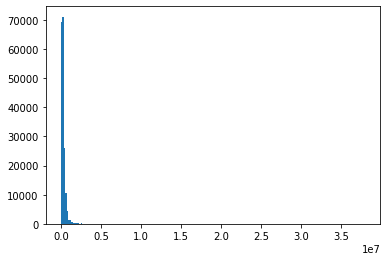

In [29]:
plt.hist(UK_2019sale_month67_concatenated.price_last,bins=200)

In [48]:
UK_2019sale_month67_concatenated[(UK_2019sale_month67_concatenated['price_last']>1e+06)].shape

(4355, 3)

Text(0.5, 0, 'Property price (£)')

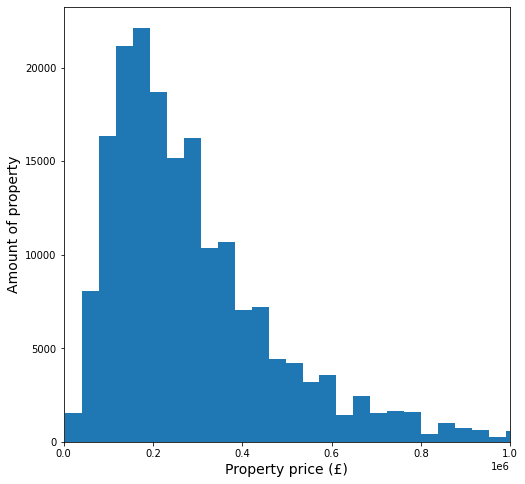

In [50]:
plt.figure(figsize=(8,8))
plt.hist(UK_2019sale_month67_concatenated['price_last'],bins=1000)
plt.xlim(0,1e+06)
plt.bar(1e+06,4355)
plt.ylabel('Amount of property', color = 'black',fontsize=14) 
plt.xlabel('Property price (£)', color = 'black',fontsize=14) 

Text(0.5, 0, 'Property price (£)')

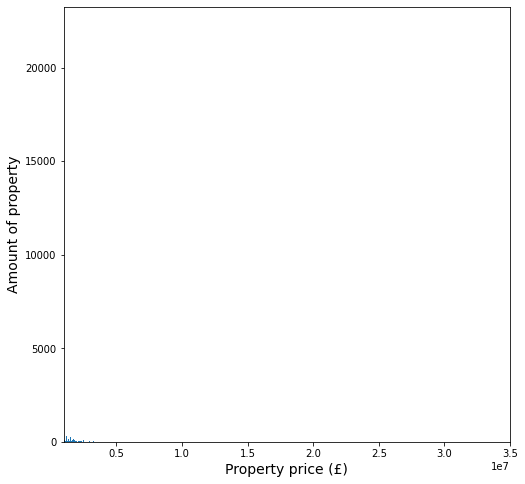

In [38]:
plt.figure(figsize=(8,8))
plt.hist(UK_2019sale_month67_concatenated['price_last'],bins=1000)
plt.xlim(1e+06,3.5e+07)
plt.ylabel('Amount of property', color = 'black',fontsize=14) 
plt.xlabel('Property price (£)', color = 'black',fontsize=14) 

In [21]:
df = UK_2019sale_month67_concatenated.sample(500,random_state=42).sort_values(by='len_description',ascending=True)

<AxesSubplot:xlabel='len_description'>

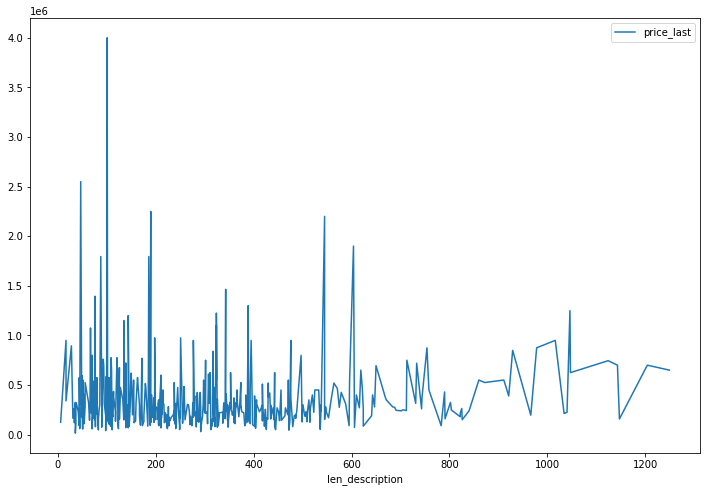

In [22]:
df.plot(x='len_description',y='price_last',kind='line',figsize=(12,8))

In [11]:
df = UK_2019sale_month67_concatenated[UK_2019sale_month67_concatenated.price_last !=0].groupby('len_description')['price_last'].agg(['min','max','mean','count'])

In [12]:
df.columns

Index(['min', 'max', 'mean', 'count'], dtype='object')

NameError: name 'X_axis' is not defined

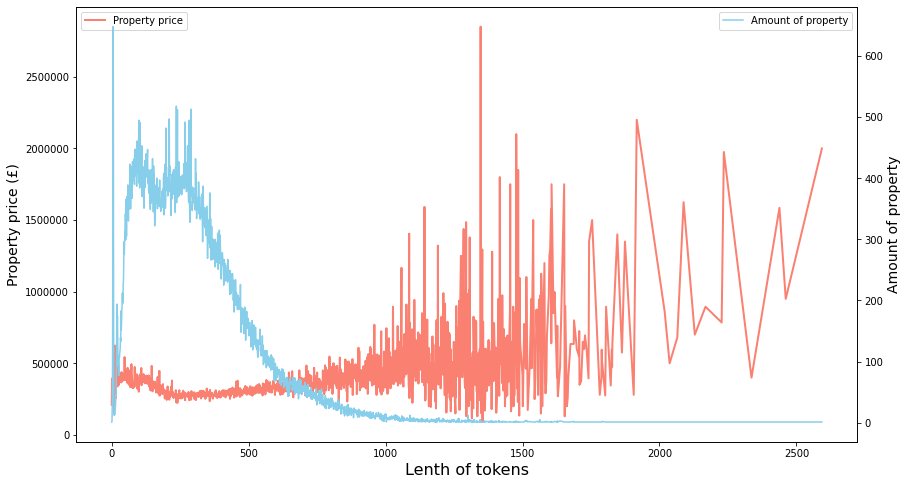

In [28]:
# Define Data

x = df.index
#X_axis = np.arange(len(x))
data_1 = df['mean']
data_2 = df['count'] 
data_3 = df['min'] 
data_4 = df['max'] 
  
# Create Plot

fig, ax1 = plt.subplots(figsize=(14, 8)) 
  
ax1.set_xlabel('Lenth of tokens',fontsize=16) 
ax1.set_ylabel('Property price (£)', color = 'black',fontsize=14) 
#ax1.fill_between(x, data_3, data_4, color = 'salmon',alpha=.5, linewidth=0)
ax1.plot(x,data_1, color = 'salmon',label='Property price',linewidth=2) 
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.legend(loc=2) 
ax1.ticklabel_format(style='plain')

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Amount of property', color = 'black',fontsize=14) 
ax2.plot(x,data_2, color = 'skyblue',label='Amount of property') 
ax2.tick_params(axis ='y', labelcolor = 'black') 
ax2.legend(loc=1)

plt.xticks(X_axis,x)
#plt.xticks(rotation=90)
ax1.tick_params(axis='x', labelrotation = 90)

# plt.xlabel('xlabel', fontsize=18)

ax1.xaxis.set_tick_params(labelsize=14)

# Show plot
#plt.legend(['a','b'],loc=2)

plt.show()

In [17]:
text_list = UK_2019sale_month67_concatenated.columns.to_list()[-84:-46]

In [18]:
len(text_list)

38

In [20]:
UK_2019sale_month67 = UK_2019sale_month67_concatenated.drop(columns=text_list)

In [22]:
UK_2019sale_month67.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'listing_id',
       'start_date', 'end_date', 'price_last', 'price_flag', 'num_bed_last',
       'bed_flag', 'num_floors_max', 'num_bath_max', 'num_reception_max',
       'pcu', 'lon', 'lat_left', 'address', 'street_name', 'property_num',
       'post_town', 'country', 'county', 'category', 'description', 'lad20nm',
       'log_price_last', 'nuts118cd', 'description_norm', 'tokens',
       'tokens_len', 'len_description', 'bi_gram_tokens', 'bi_gram_token_list',
       'tri_gram_token', 'tri_gram_token_list', 'tri_gram_replaced',
       'property_type_Barn conversion', 'property_type_Block of flats',
       'property_type_Bungalow', 'property_type_Chalet',
       'property_type_Cottage', 'property_type_Country house',
       'property_type_Detached bungalow', 'property_type_Detached house',
       'property_type_End terrace house', 'property_type_Equestrian property',
       'property_type_Farm', 'property_type_Farmhouse', 'propert